In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_18_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-18 00:10:00  2013-03-18  00:10:00     600  3.37433  3.6176  3.0209   
2013-03-18 00:20:00  2013-03-18  00:20:00     600  3.01631  3.2963  2.7914   
2013-03-18 00:30:00  2013-03-18  00:30:00     600  2.75468  3.0668  2.5619   
2013-03-18 00:40:00  2013-03-18  00:40:00     600  2.40125  2.7914  2.1947   
2013-03-18 00:50:00  2013-03-18  00:50:00     600  2.45174  2.6078  2.2865   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-18 00:10:00  0.10098  3.37333  3.6166  3.0199  ...   37  124  125   
2013-03-18 00:20:00  0.09639  3.01531  3.2953  2.7445  ...   36  124  125   
2013-03-18 00:30:00  0.11934  2.74450  3.0658  2.5150  ...   36  124  124   
2013-03-18 00:40:00  0.14688  2.40484  2.7445  2.1478  ...   36  124  124   
2013-03-18 00:50:00  0.06426  2.46910  2.6527  2.2396  ...   36  124  124   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-18 00:10:00  124   83   83   83   83   83   83  
2013-03-18 00:20:00  124   83   83   83   83   83   83  
2013-03-18 00:30:00  124   83   83   83   83   83   83  
2013-03-18 00:40:00  124   83   83   83   83   83   83  
2013-03-18 00:50:00  124   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       5.462334
std        1.987865
min        0.436730
25%        4.130533
50%        5.770310
75%        7.002725
max        9.042980
Name: s1a, dtype: float64


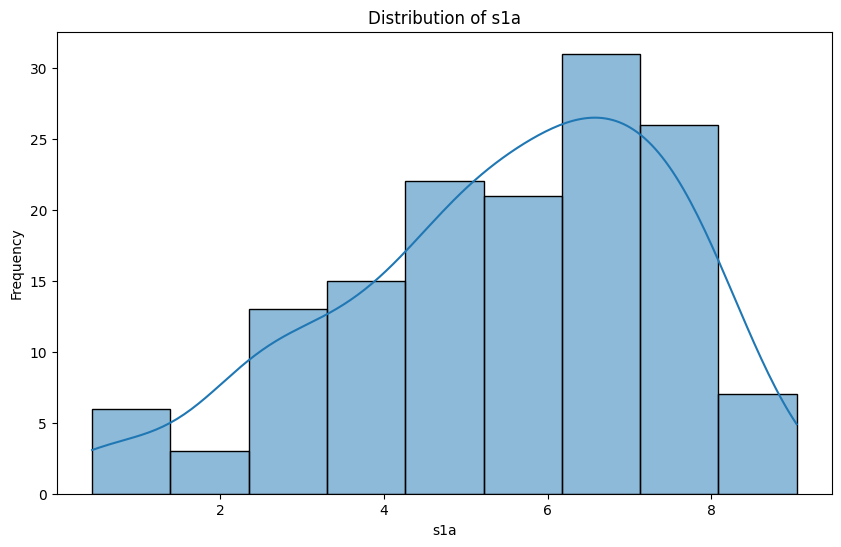


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       6.831238
std        2.716153
min        0.496400
25%        4.799525
50%        7.335500
75%        8.815775
max       12.476300
Name: s1x, dtype: float64


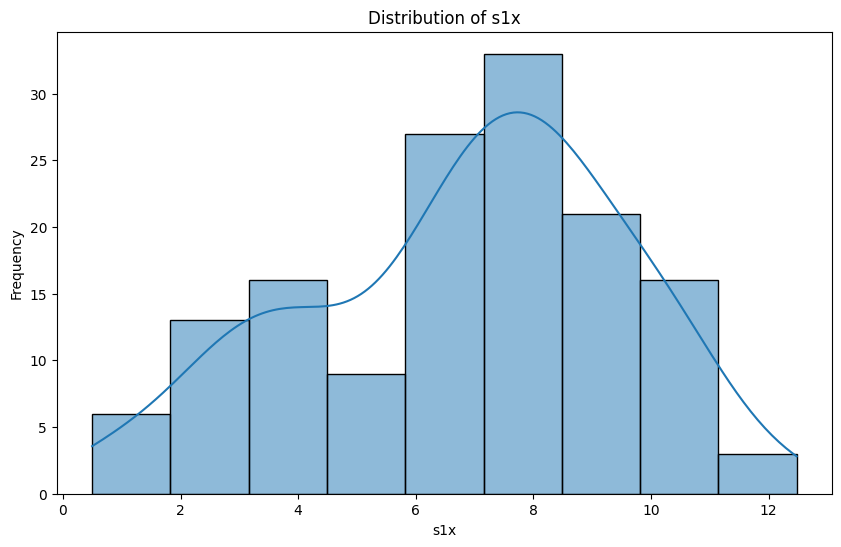


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       4.159475
std        1.829837
min        0.312800
25%        2.837300
50%        4.122500
75%        5.499500
max        8.069900
Name: s1i, dtype: float64


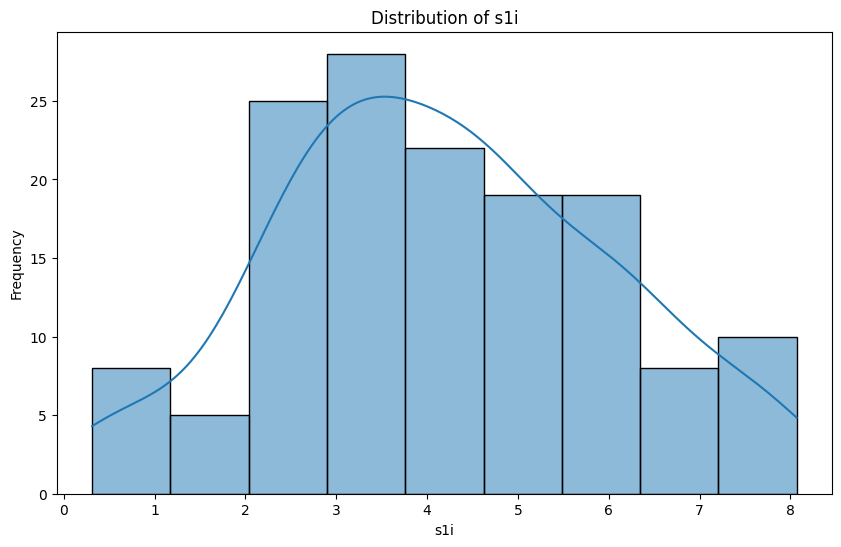


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.528743
std        0.463135
min        0.027540
25%        0.146880
50%        0.328185
75%        0.848002
max        2.350080
Name: s1s, dtype: float64


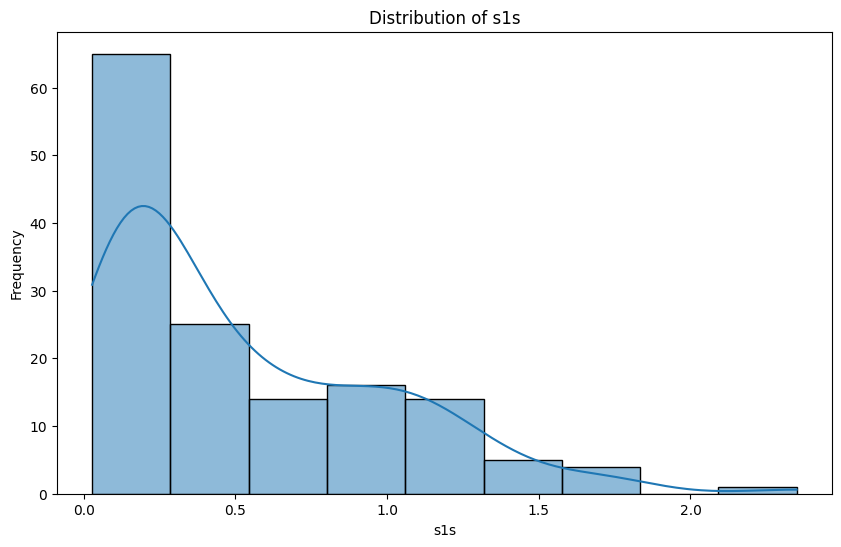


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       5.454576
std        1.978962
min        0.440320
25%        4.138713
50%        5.767015
75%        6.995988
max        9.023620
Name: s2a, dtype: float64


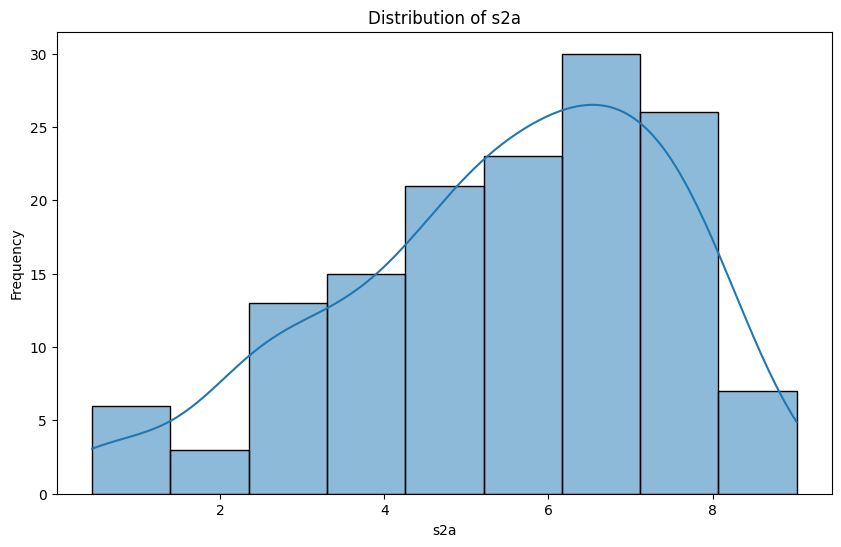


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       6.839800
std        2.732585
min        0.541300
25%        4.787050
50%        7.288600
75%        8.677075
max       12.154000
Name: s2x, dtype: float64


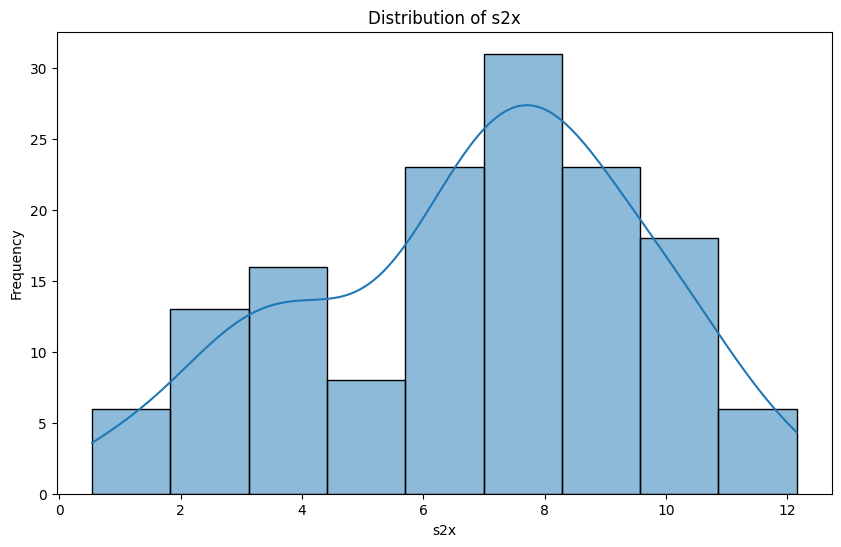


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       4.139669
std        1.834798
min        0.311800
25%        2.882200
50%        4.075600
75%        5.452600
max        7.977100
Name: s2i, dtype: float64


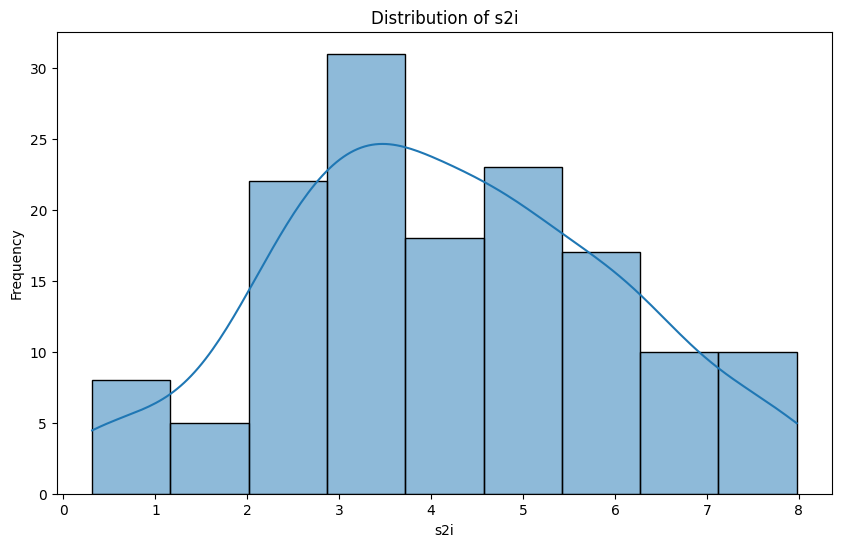


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.529539
std        0.462188
min        0.027540
25%        0.153765
50%        0.323595
75%        0.844560
max        2.331720
Name: s2s, dtype: float64


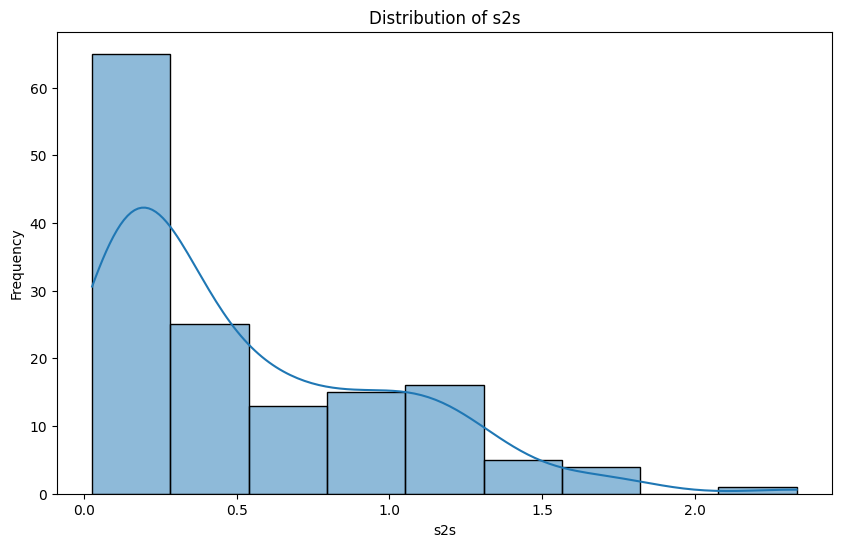


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       5.318265
std        1.918744
min        0.360610
25%        4.374237
50%        5.576030
75%        6.766360
max        9.030040
Name: s3a, dtype: float64


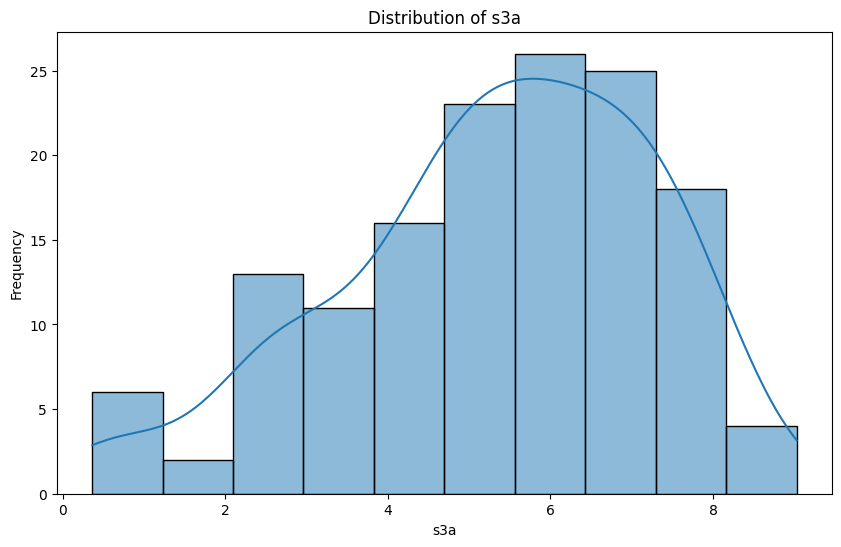


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       6.725072
std        2.695156
min        0.544090
25%        4.821468
50%        6.942955
75%        8.582807
max       12.745510
Name: s3x, dtype: float64


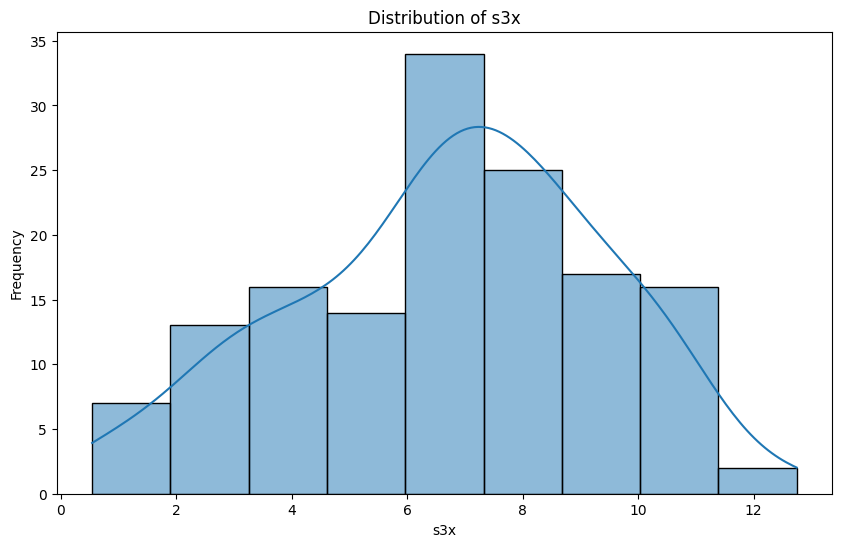


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       3.988800
std        1.752978
min        0.223000
25%        2.780253
50%        3.846730
75%        5.176960
max        7.745680
Name: s3i, dtype: float64


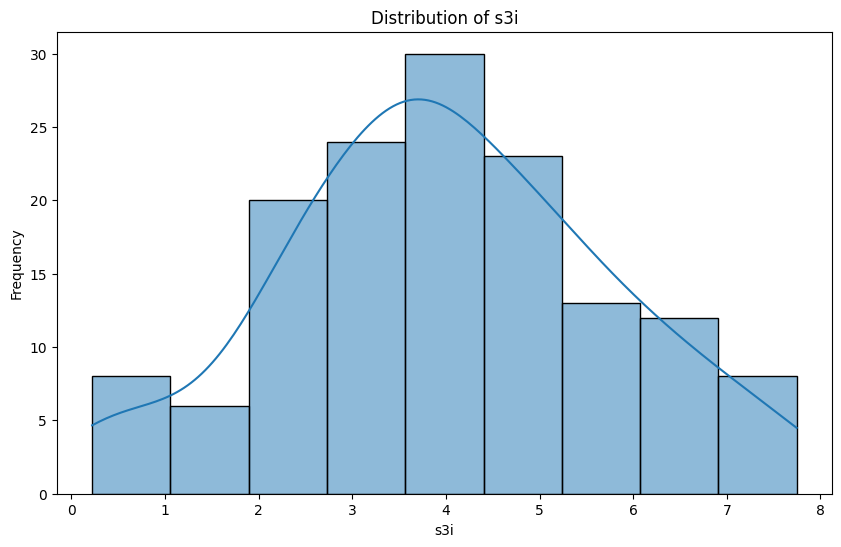


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.536647
std        0.468476
min        0.041280
25%        0.163983
50%        0.337145
75%        0.845155
max        2.302670
Name: s3s, dtype: float64


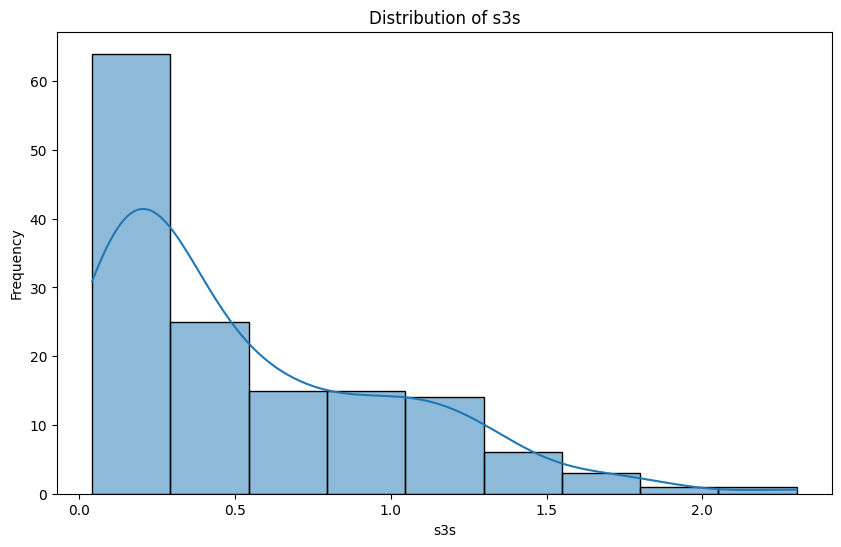


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     105.520833
std       69.617634
min        2.000000
25%       94.500000
50%      107.500000
75%      119.000000
max      359.000000
Name: d1a, dtype: float64


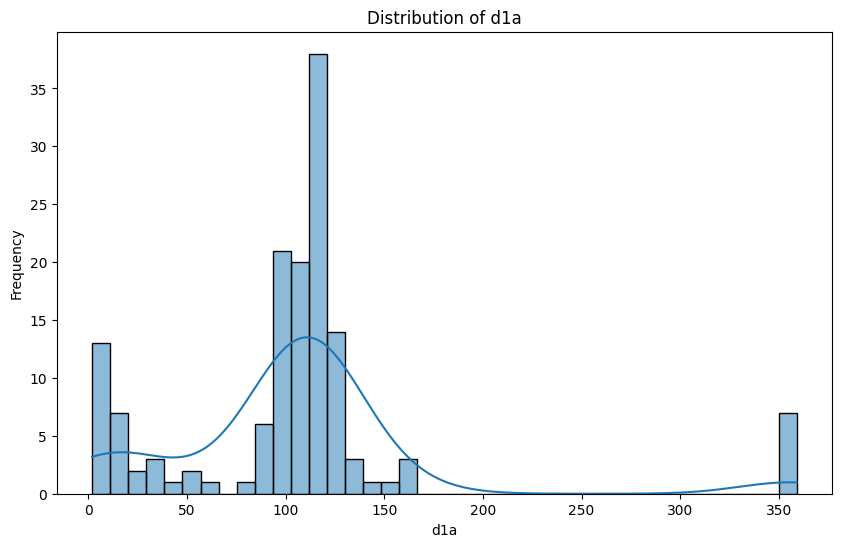


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       5.638889
std        5.016910
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       26.000000
Name: d1s, dtype: float64


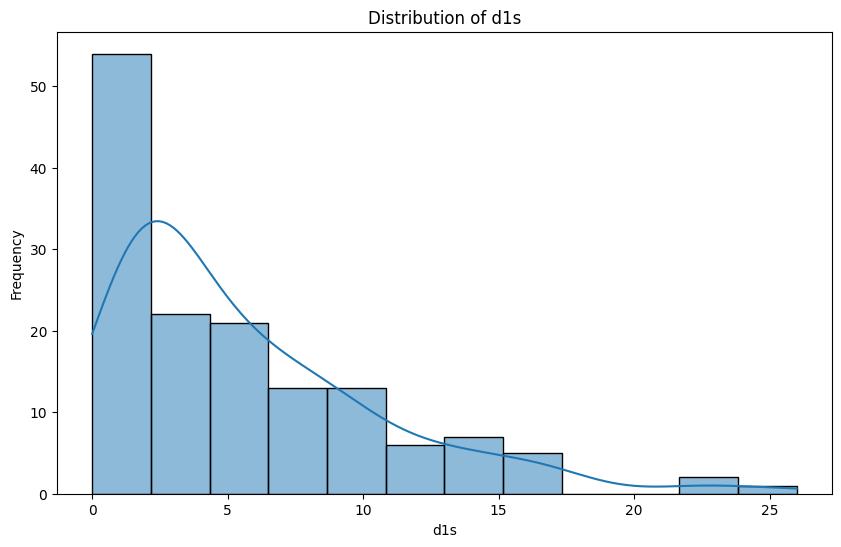


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     119.166667
std       81.327878
min        2.000000
25%       96.750000
50%      115.000000
75%      123.250000
max      360.000000
Name: d2a, dtype: float64


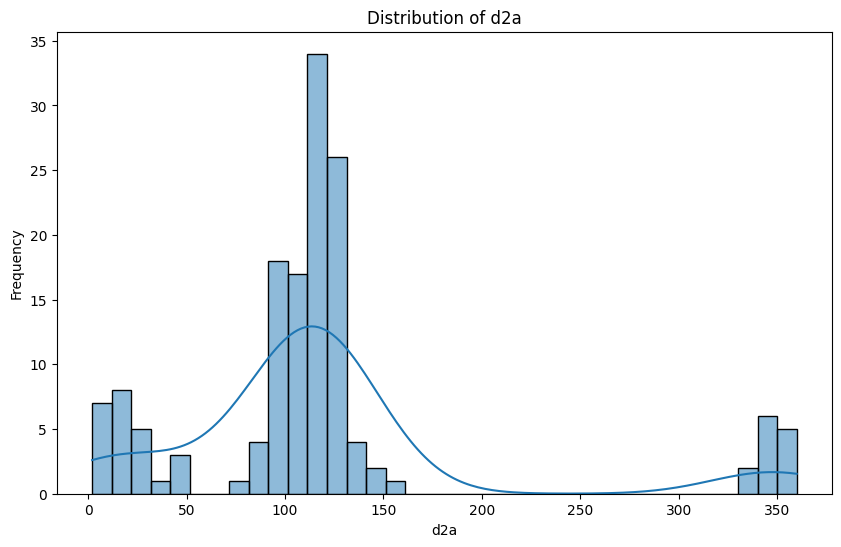


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       6.305556
std        5.443001
min        0.000000
25%        2.000000
50%        5.000000
75%        8.250000
max       33.000000
Name: d2s, dtype: float64


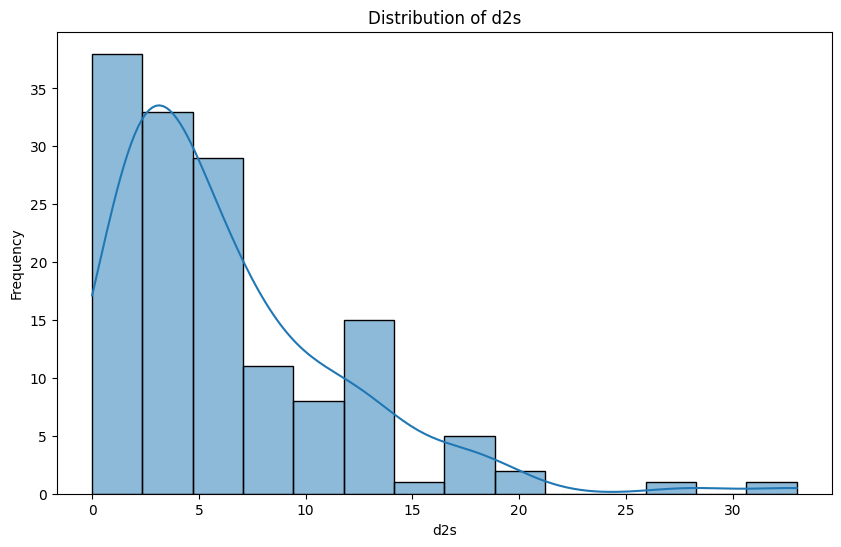


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      53.201389
std       17.605458
min       26.000000
25%       35.750000
50%       54.500000
75%       69.000000
max       84.000000
Name: h1a, dtype: float64


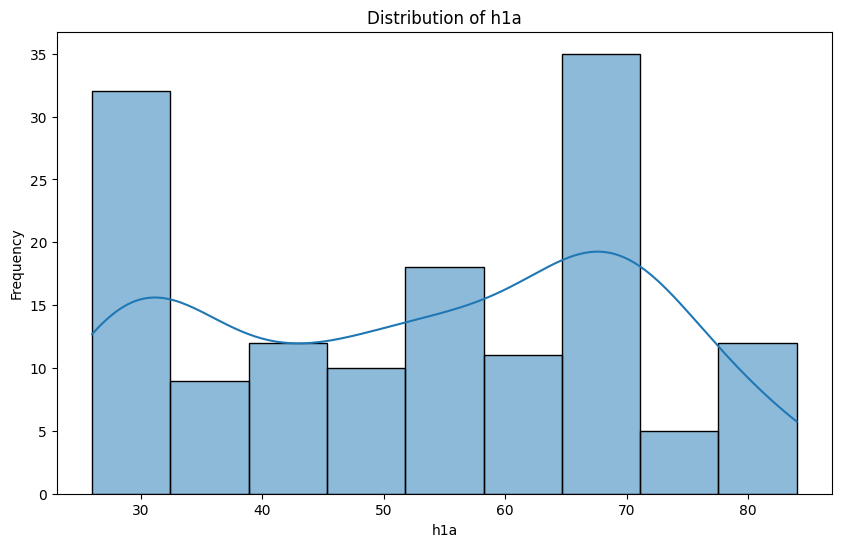


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      54.659722
std       17.775666
min       26.000000
25%       36.750000
50%       57.000000
75%       70.000000
max       84.000000
Name: h1x, dtype: float64


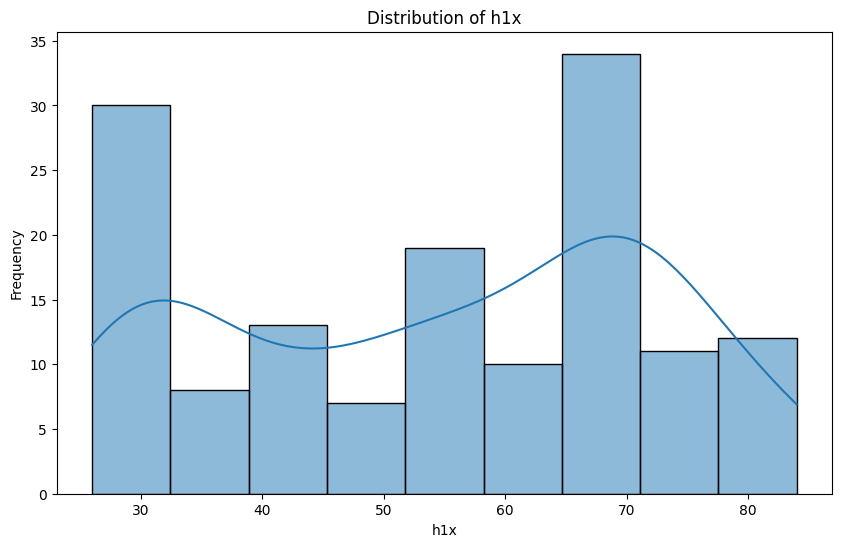


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      51.965278
std       17.417302
min       26.000000
25%       34.750000
50%       53.000000
75%       68.000000
max       84.000000
Name: h1i, dtype: float64


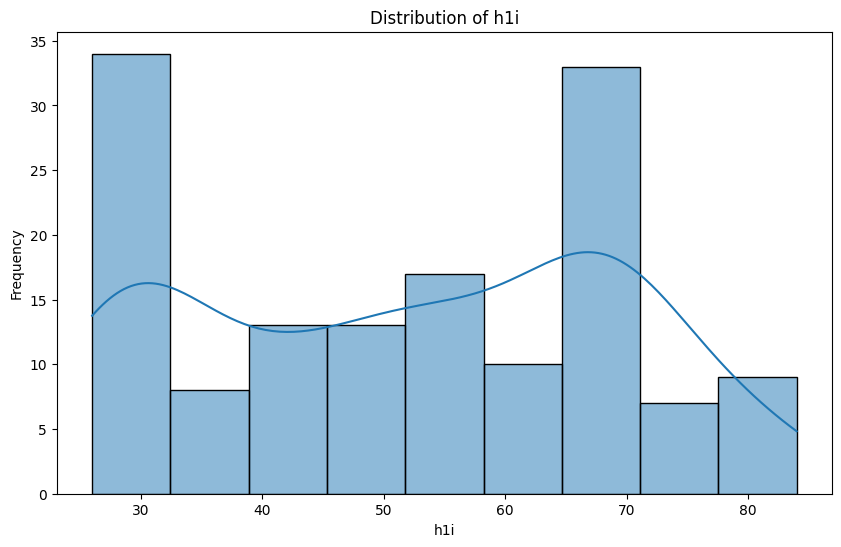


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       1.284028
std        2.135486
min       -2.450000
25%       -1.375000
50%        2.150000
75%        3.150000
max        4.050000
Name: t1a, dtype: float64


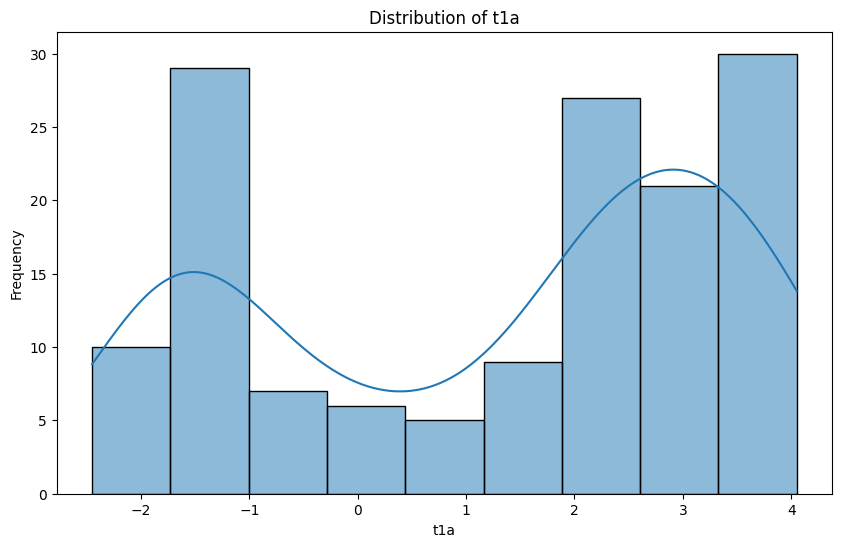


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       1.376389
std        2.136299
min       -2.350000
25%       -1.275000
50%        2.250000
75%        3.250000
max        4.150000
Name: t1x, dtype: float64


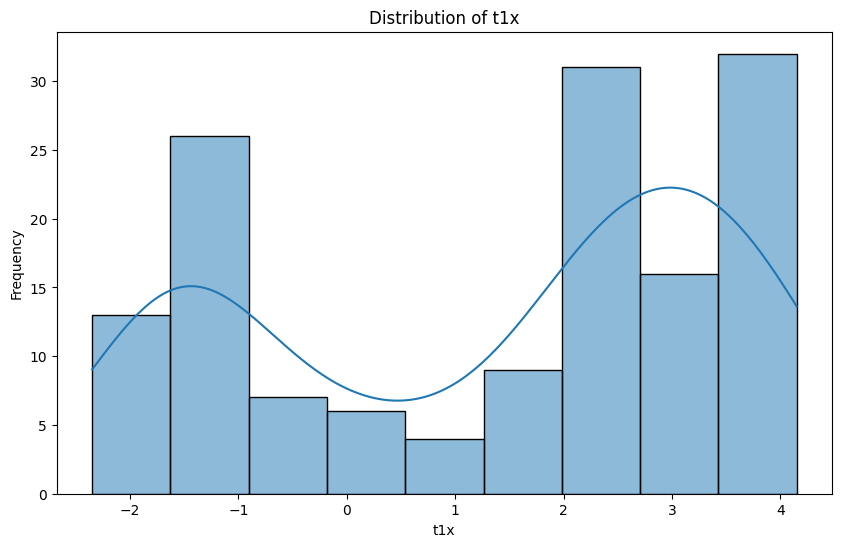


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       1.198611
std        2.135612
min       -2.550000
25%       -1.450000
50%        2.100000
75%        3.075000
max        4.050000
Name: t1i, dtype: float64


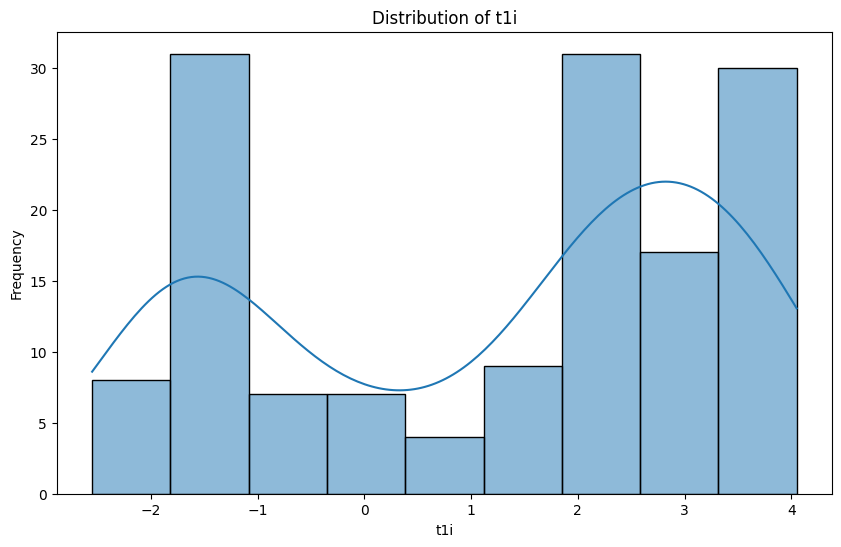


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1019.354167
std         1.636424
min      1015.000000
25%      1018.000000
50%      1019.500000
75%      1021.000000
max      1021.000000
Name: b1a, dtype: float64


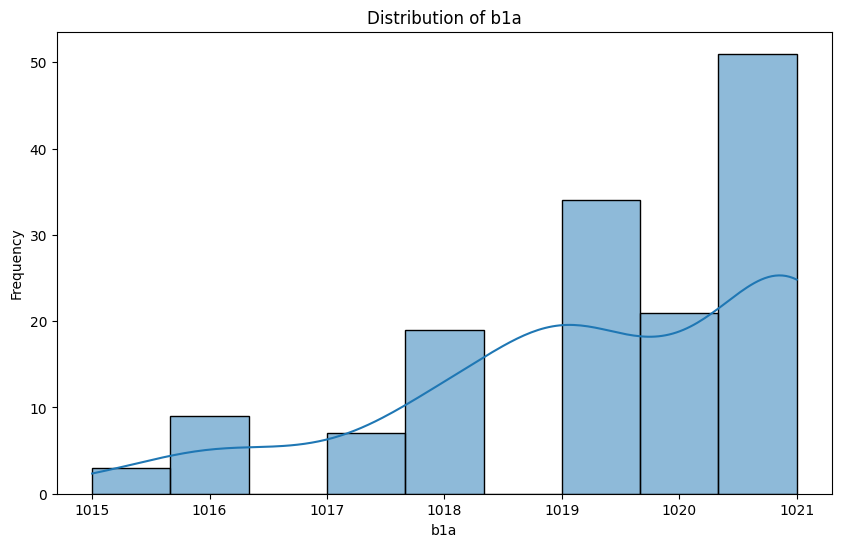


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1019.729167
std         1.774799
min      1015.000000
25%      1019.000000
50%      1020.000000
75%      1021.000000
max      1022.000000
Name: b1x, dtype: float64


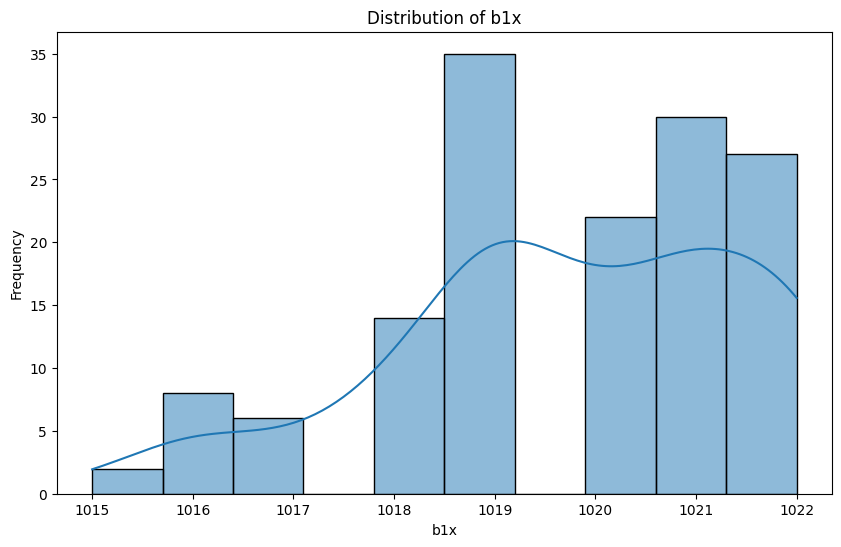


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1018.972222
std         1.765815
min      1014.000000
25%      1018.000000
50%      1019.000000
75%      1021.000000
max      1021.000000
Name: b1i, dtype: float64


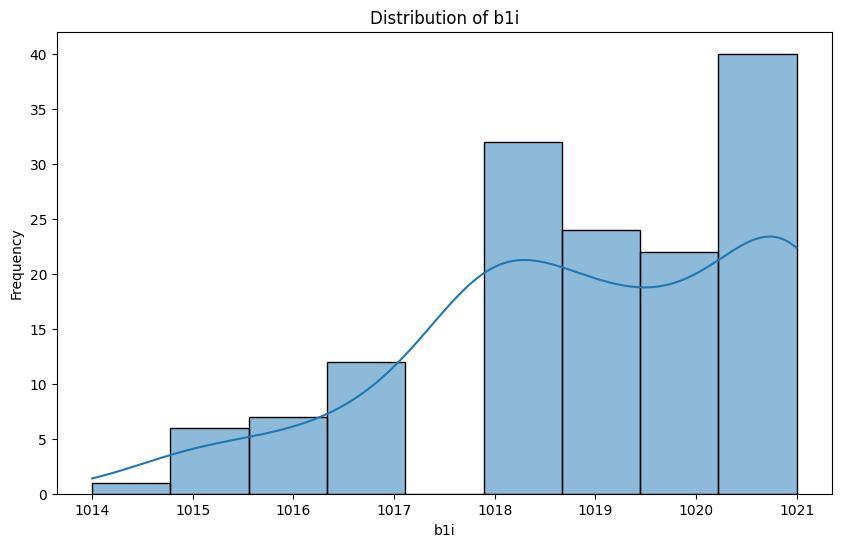


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       4.923807
std        1.750478
min        0.255510
25%        4.003747
50%        5.152290
75%        6.171308
max        8.980770
Name: p1a, dtype: float64


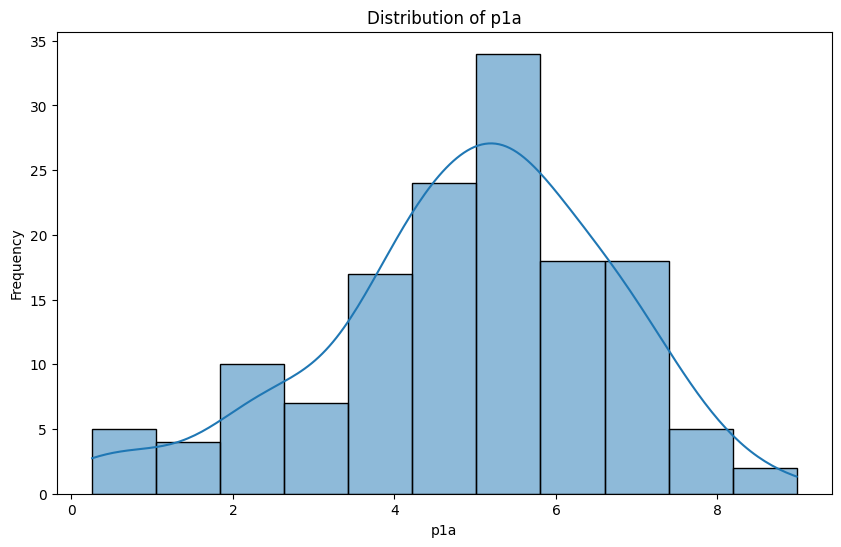


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       6.318408
std        2.610543
min        0.365550
25%        4.858850
50%        6.119725
75%        8.263212
max       12.011450
Name: p1x, dtype: float64


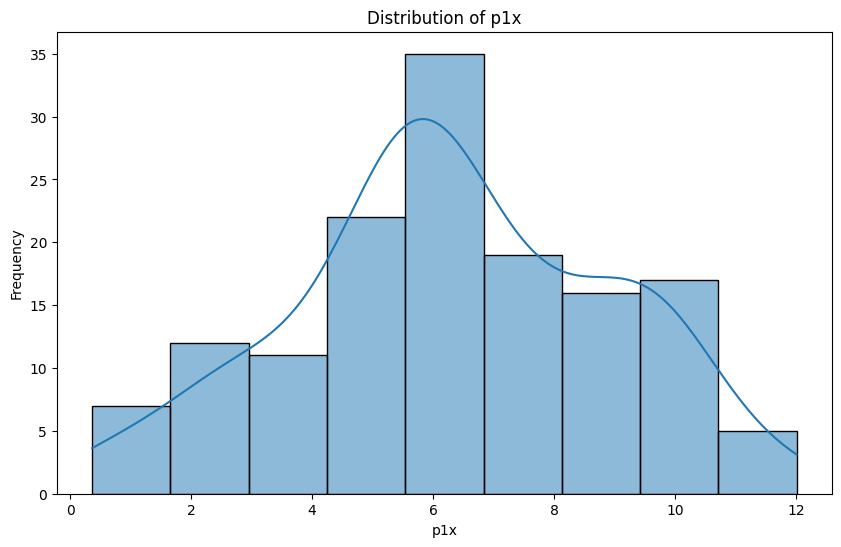


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       3.589060
std        1.374198
min        0.228000
25%        2.612200
50%        3.666750
75%        4.721300
max        6.601150
Name: p1i, dtype: float64


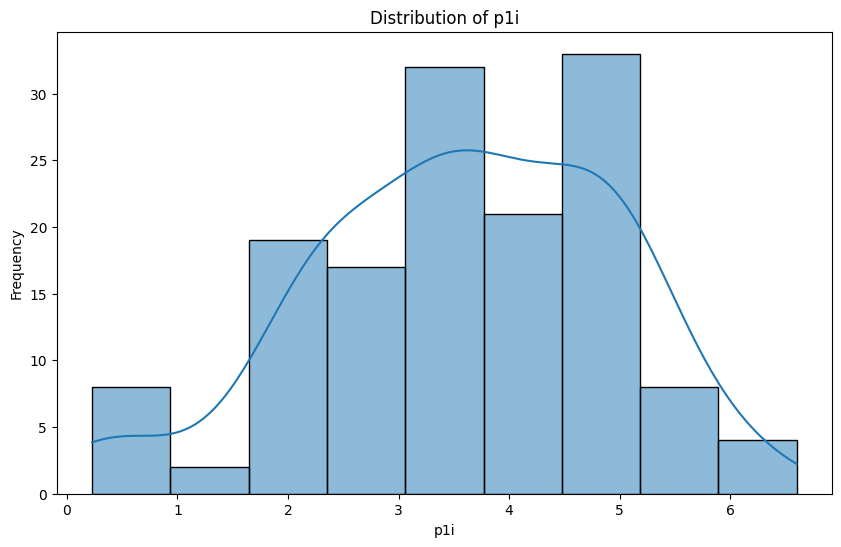


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.536638
std        0.450310
min        0.036680
25%        0.186842
50%        0.320950
75%        0.851665
max        1.939460
Name: p1s, dtype: float64


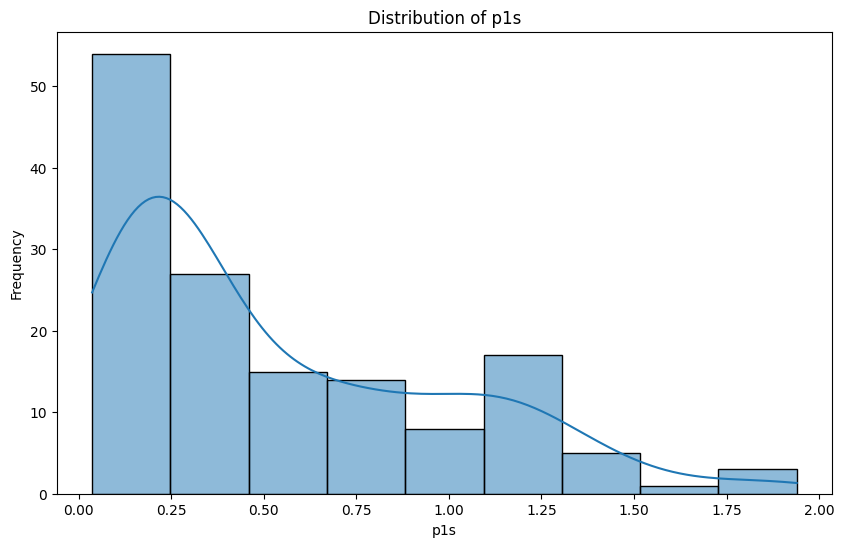


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      41.104167
std        4.187425
min       34.000000
25%       38.750000
50%       40.000000
75%       45.000000
max       48.000000
Name: tia, dtype: float64


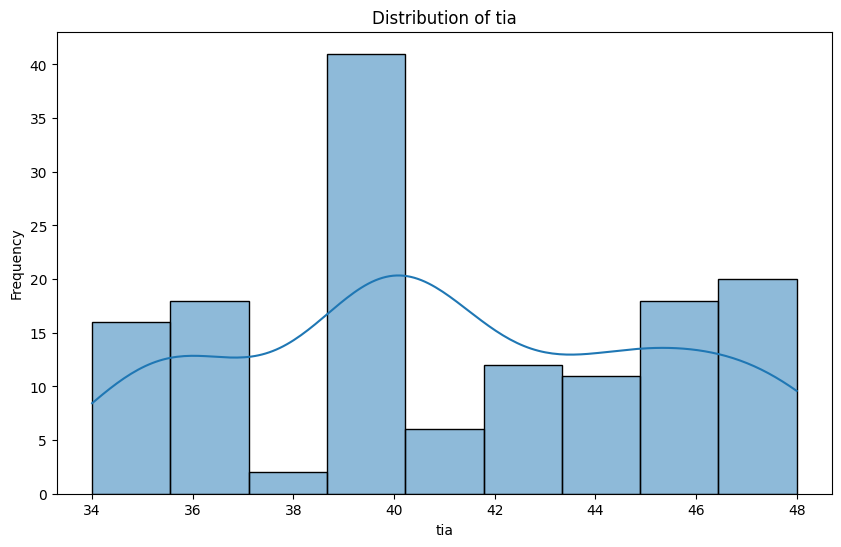


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      41.222222
std        4.175259
min       34.000000
25%       39.000000
50%       40.000000
75%       45.000000
max       48.000000
Name: tix, dtype: float64


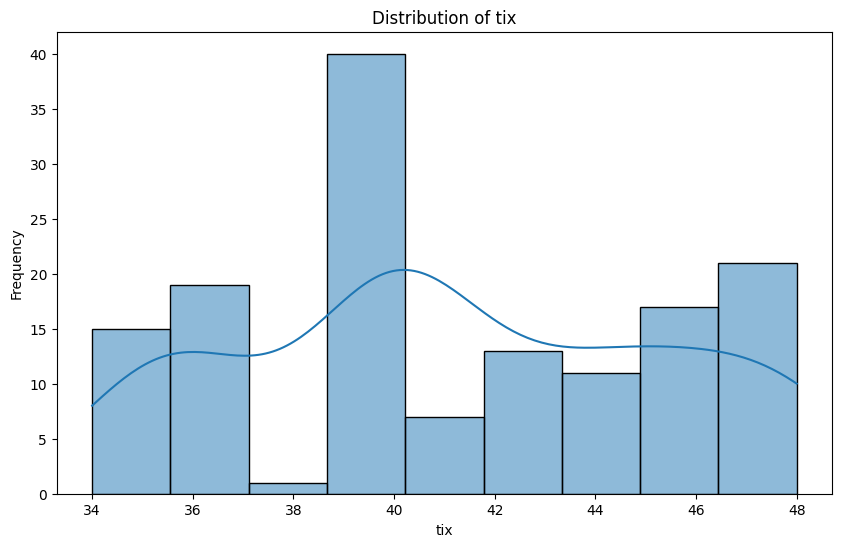


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      41.034722
std        4.173532
min       34.000000
25%       38.750000
50%       40.000000
75%       44.250000
max       48.000000
Name: tii, dtype: float64


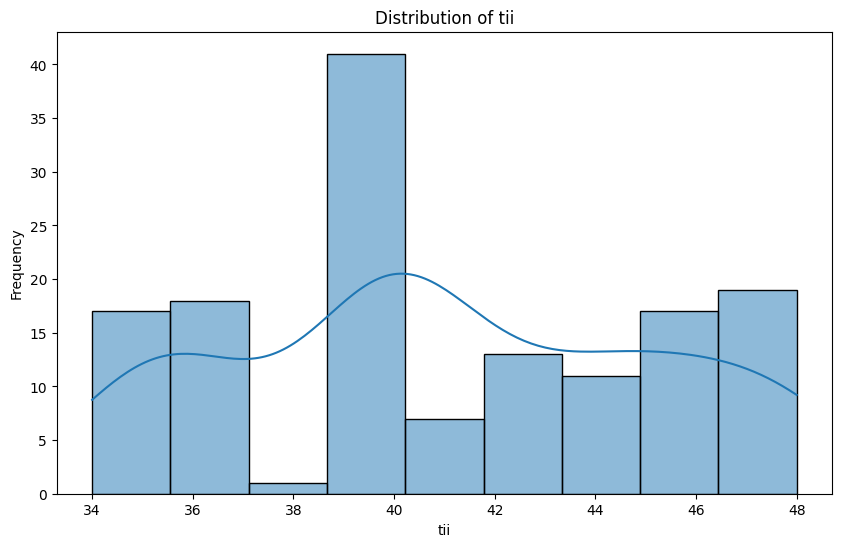


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     131.131944
std        6.186209
min      124.000000
25%      126.000000
50%      127.500000
75%      138.000000
max      140.000000
Name: vxa, dtype: float64


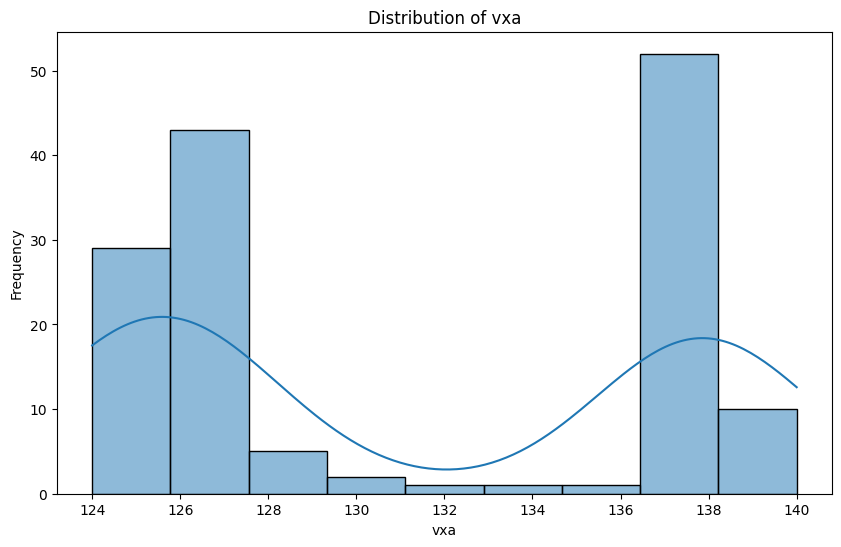


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.611111
std        6.562354
min      124.000000
25%      126.000000
50%      128.000000
75%      138.000000
max      141.000000
Name: vxx, dtype: float64


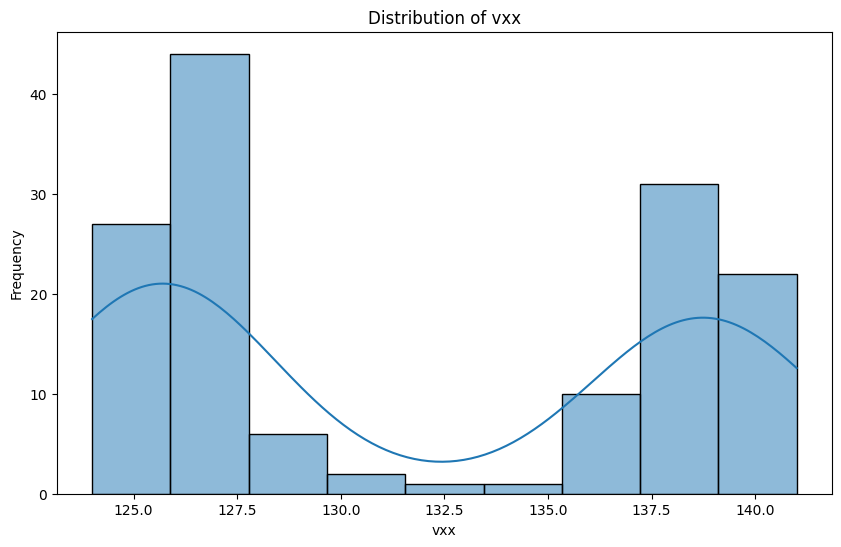


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.854167
std        6.020906
min      124.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      140.000000
Name: vxi, dtype: float64


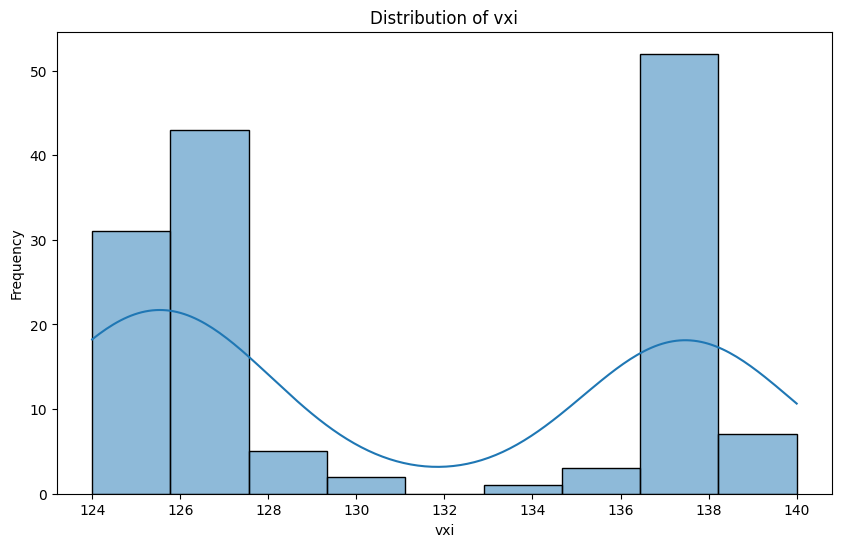


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


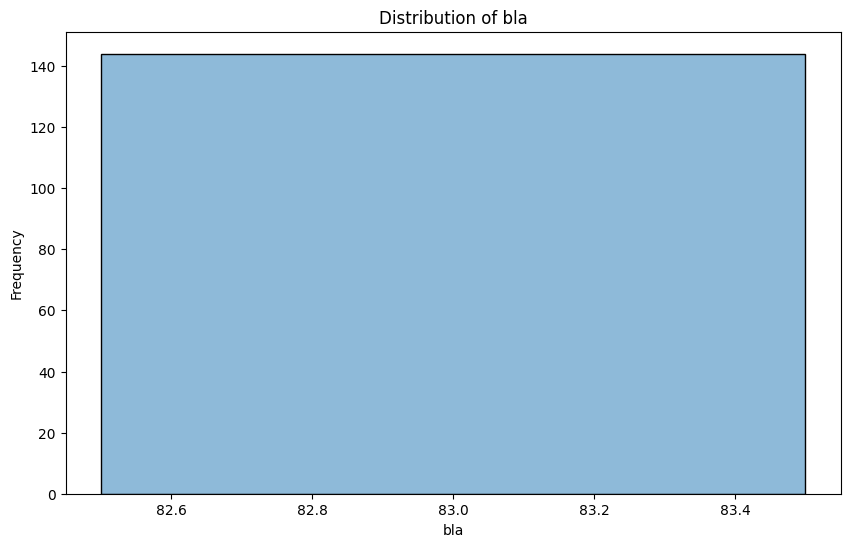


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


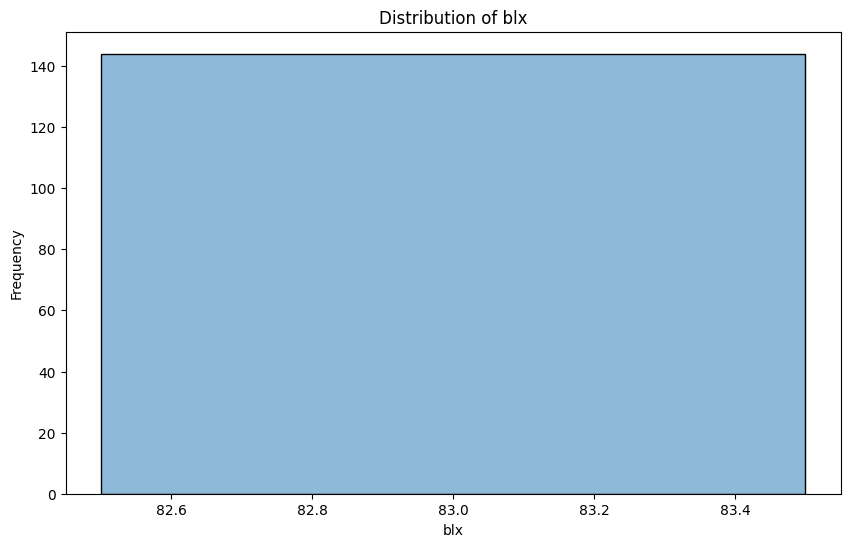


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.993056
std        0.083333
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


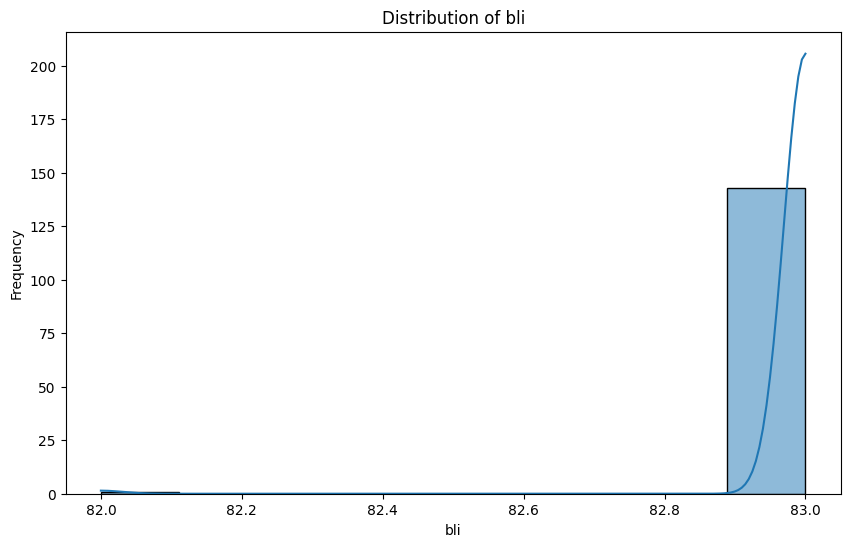


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


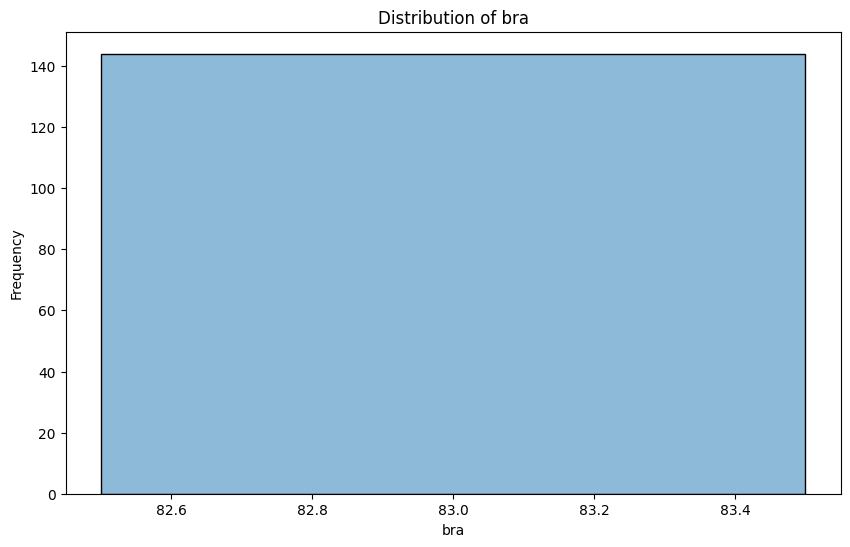


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


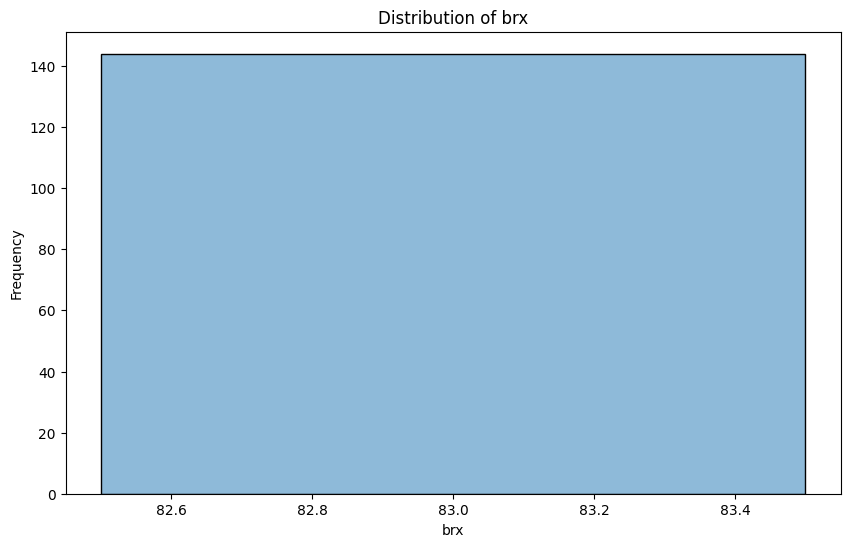


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


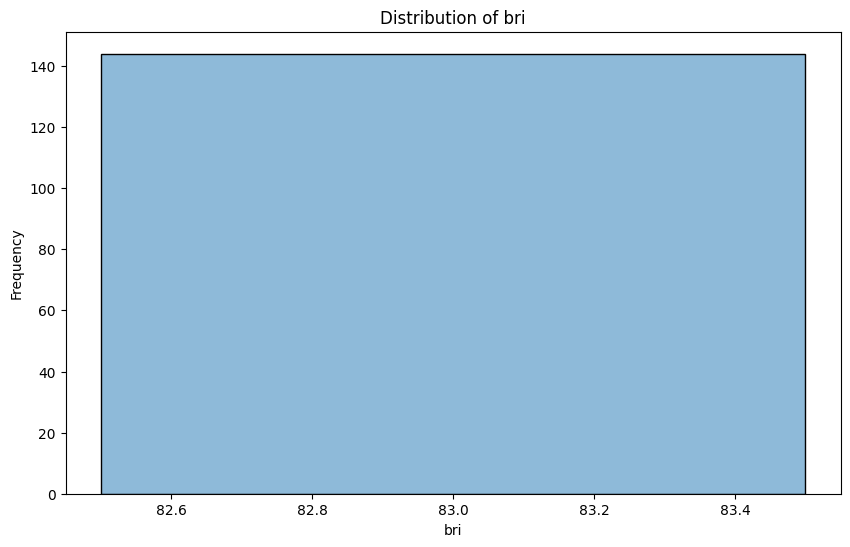

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

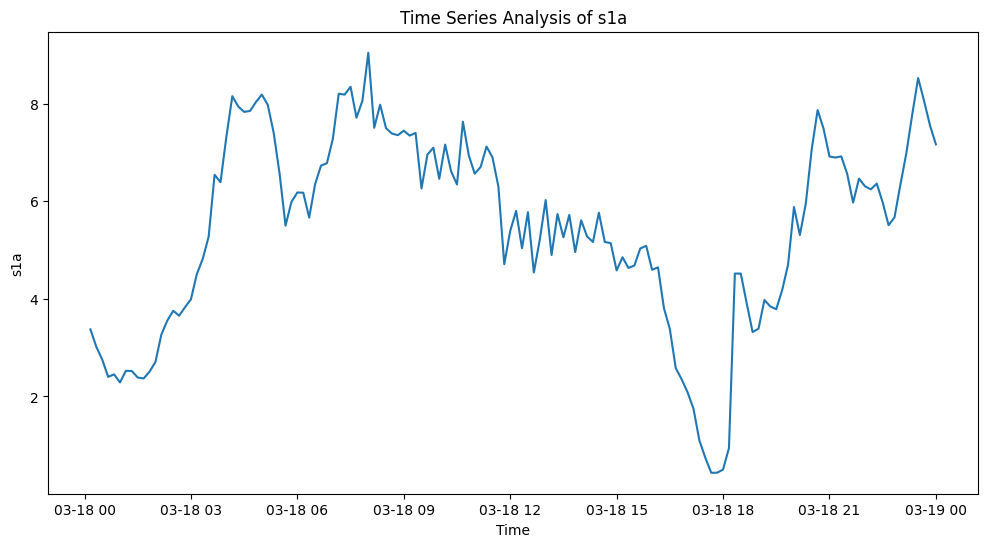

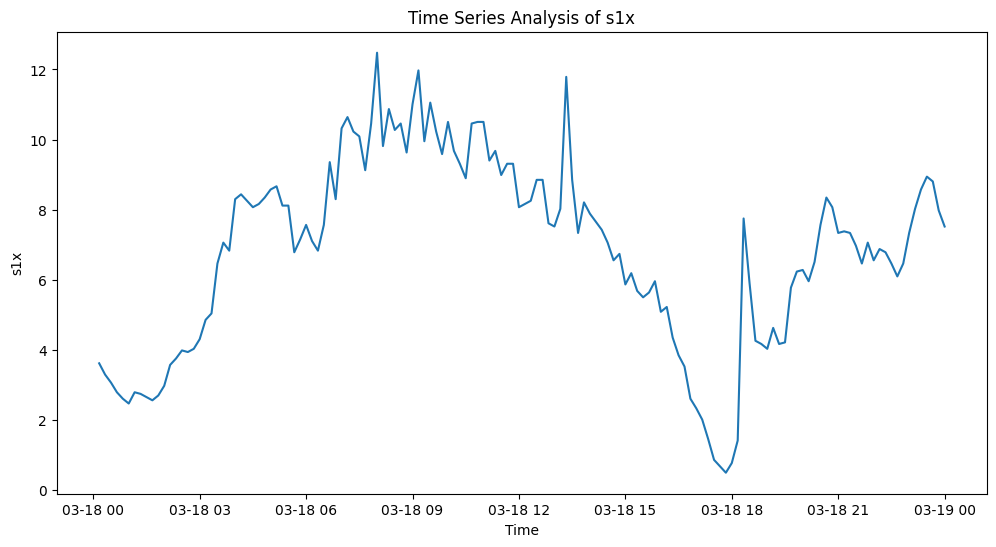

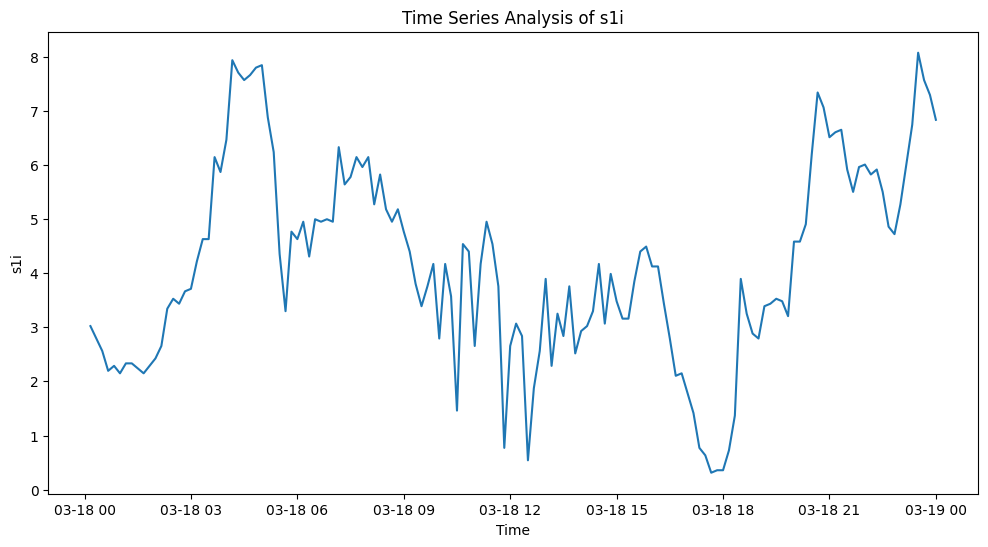

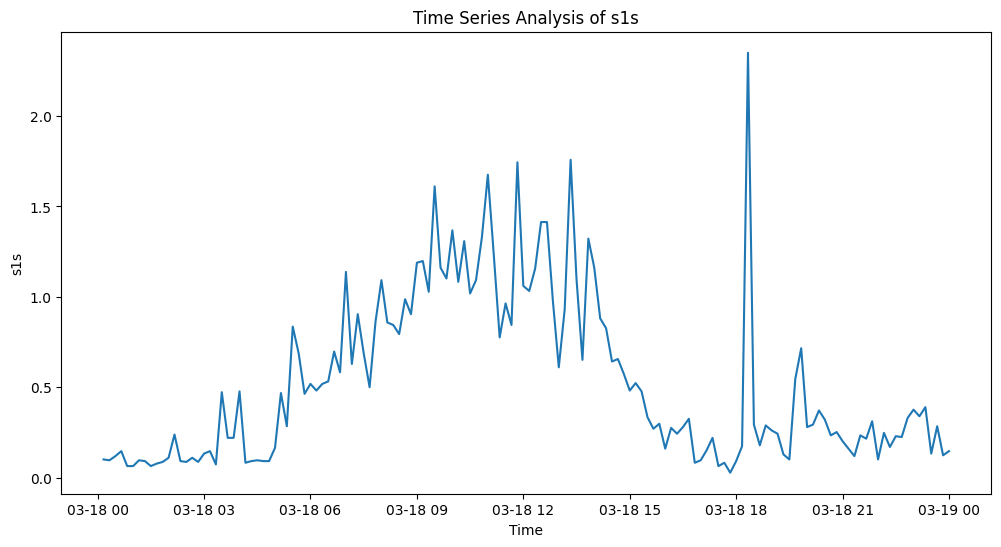

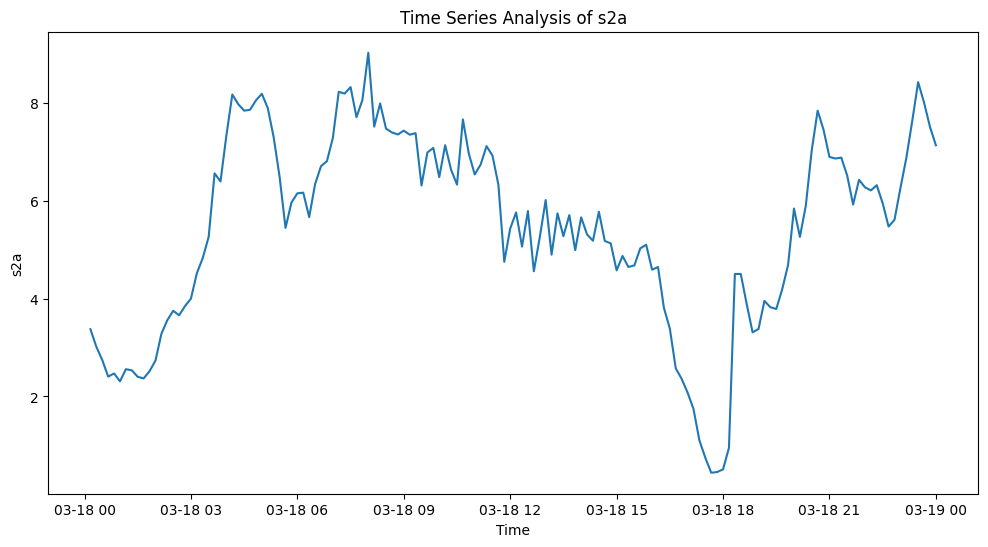

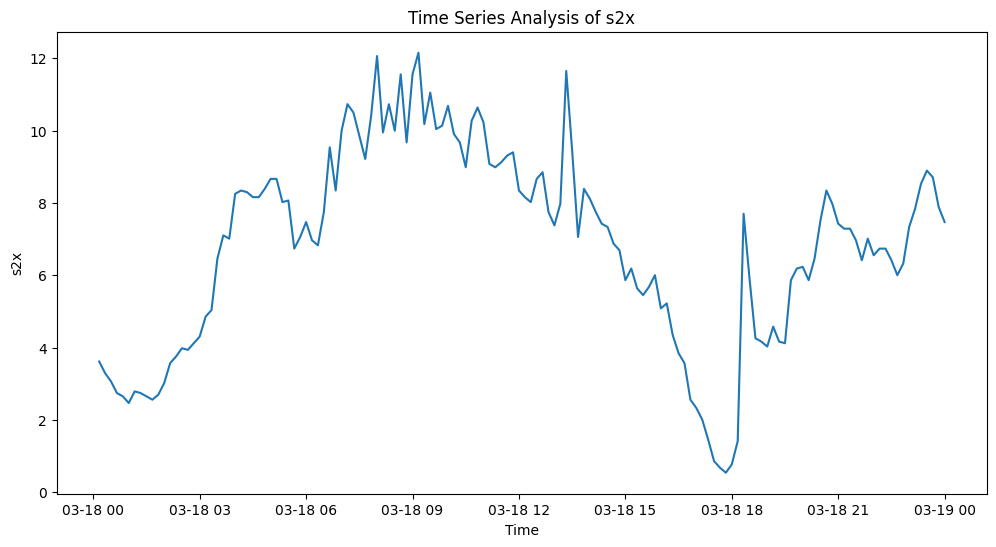

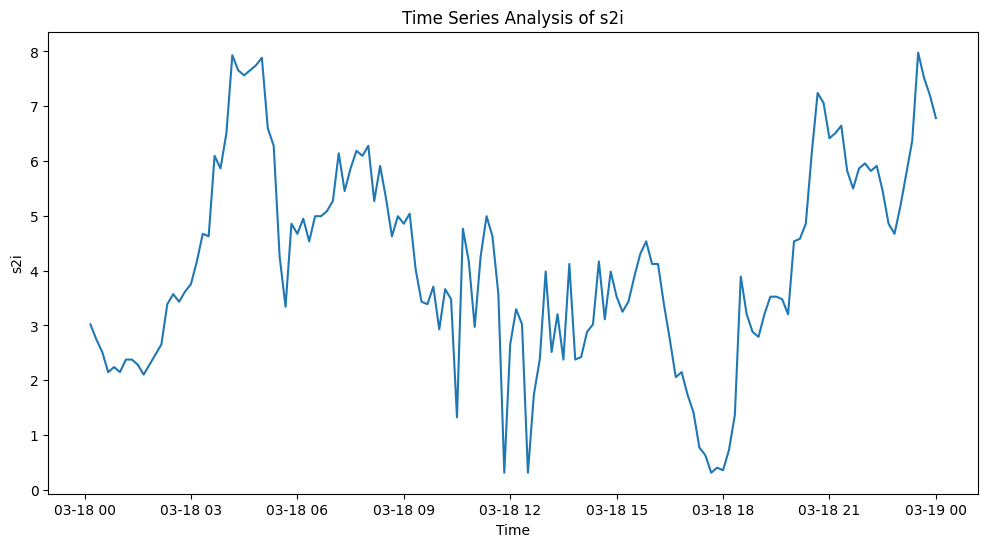

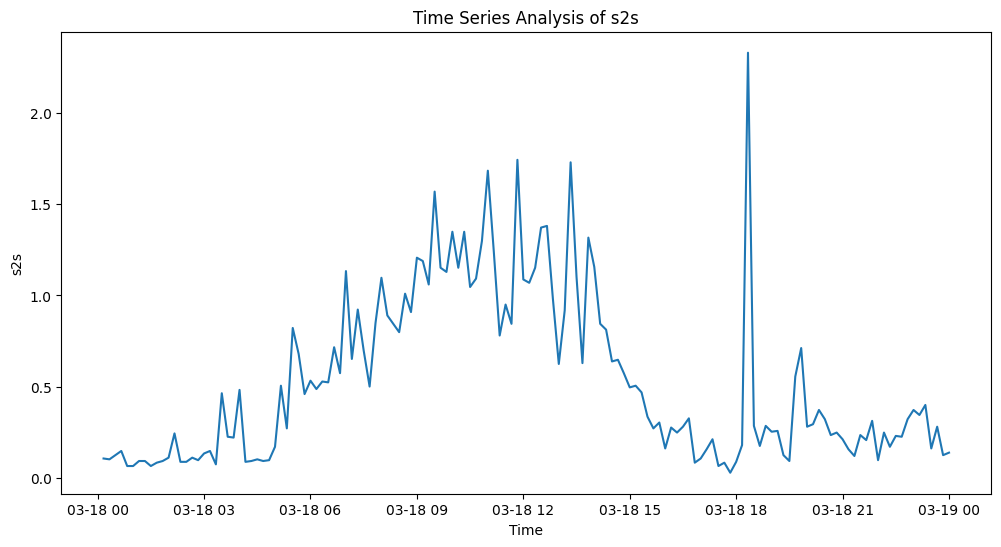

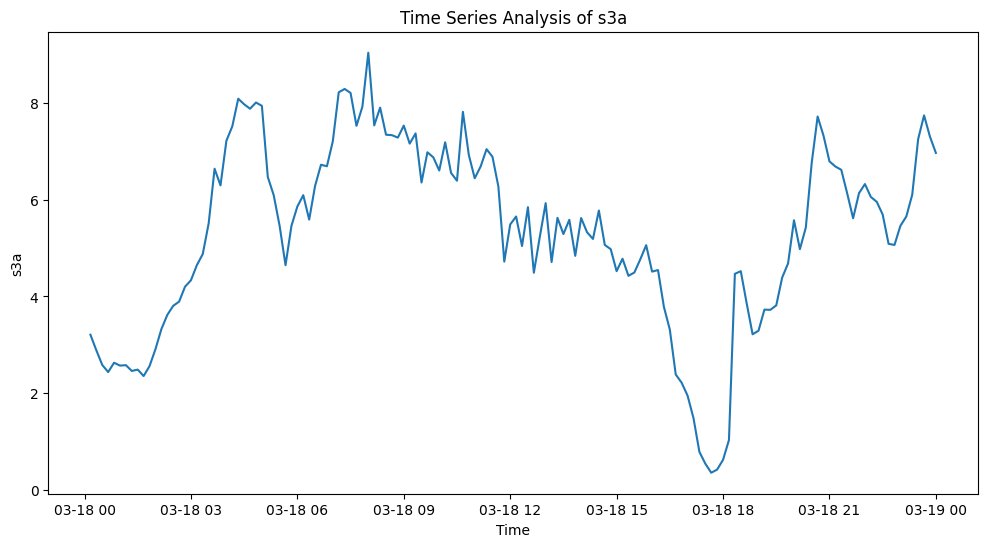

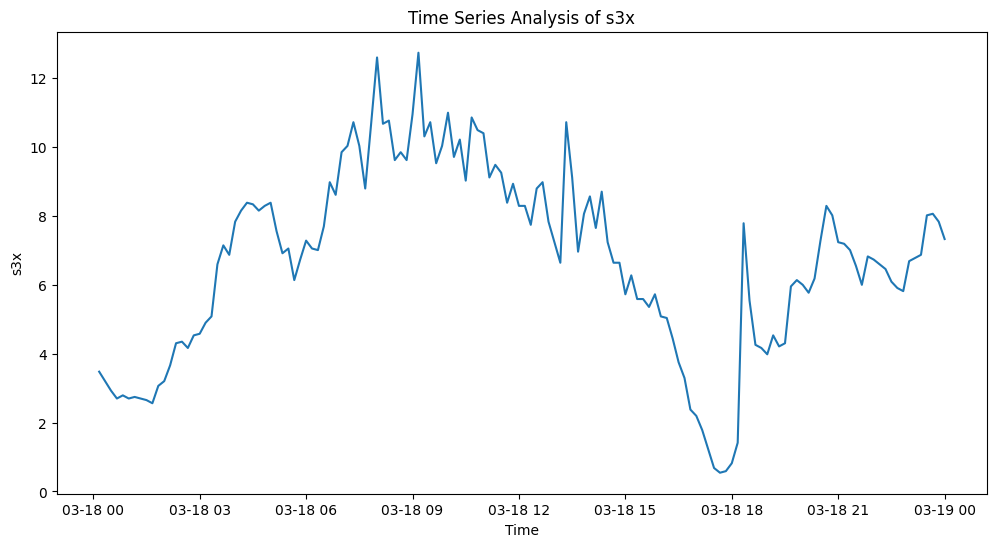

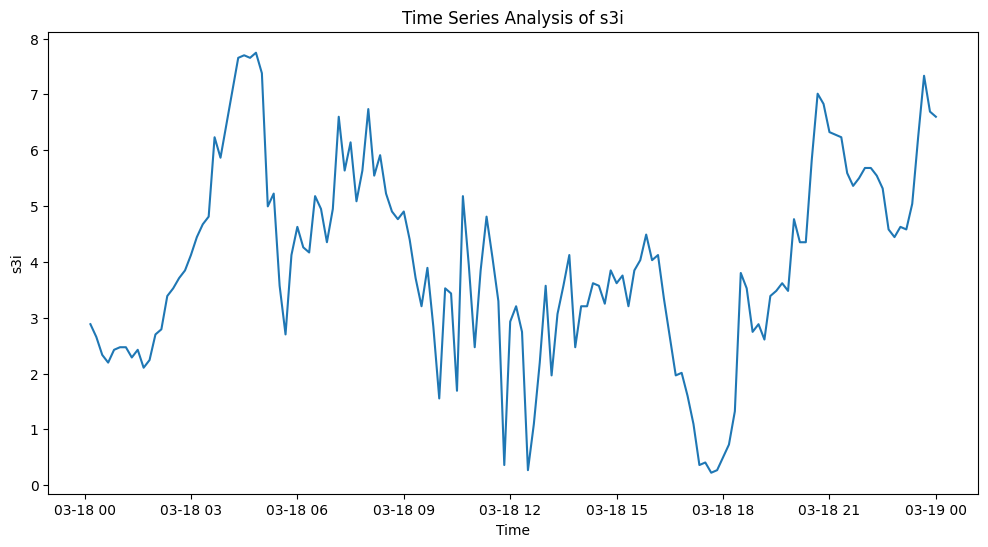

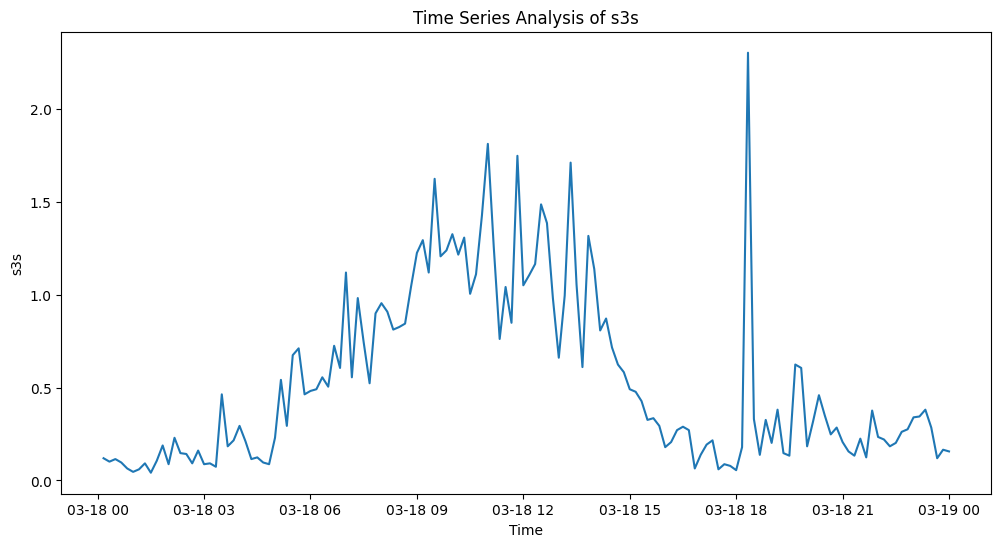

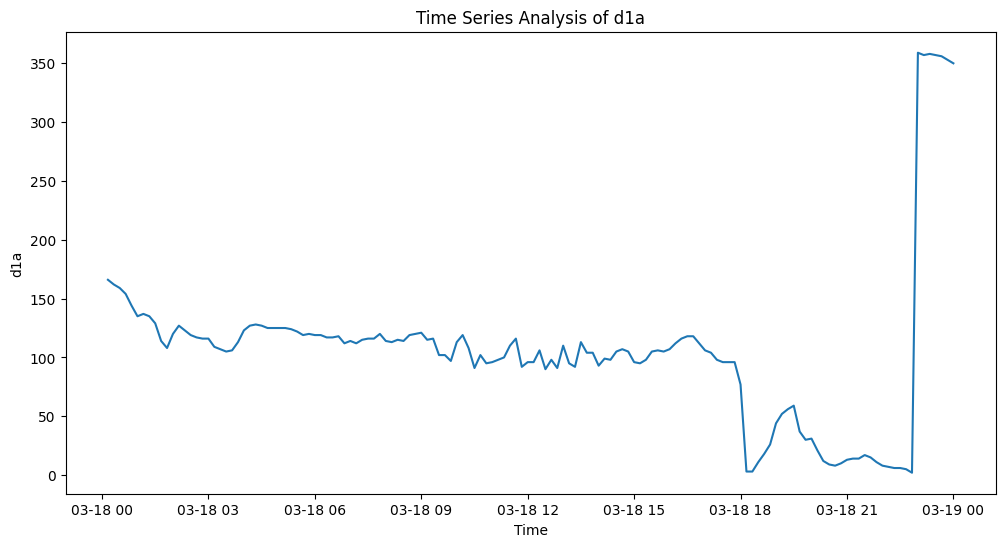

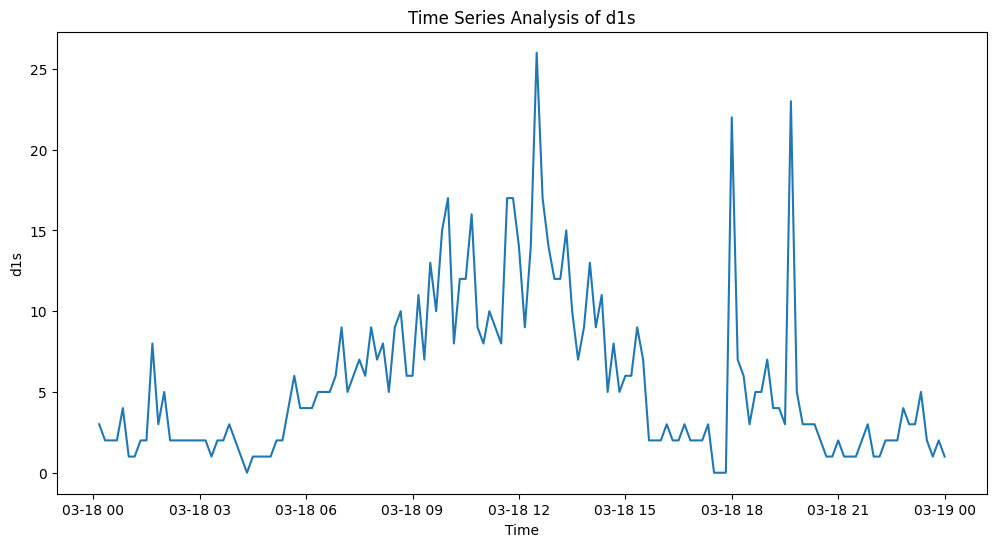

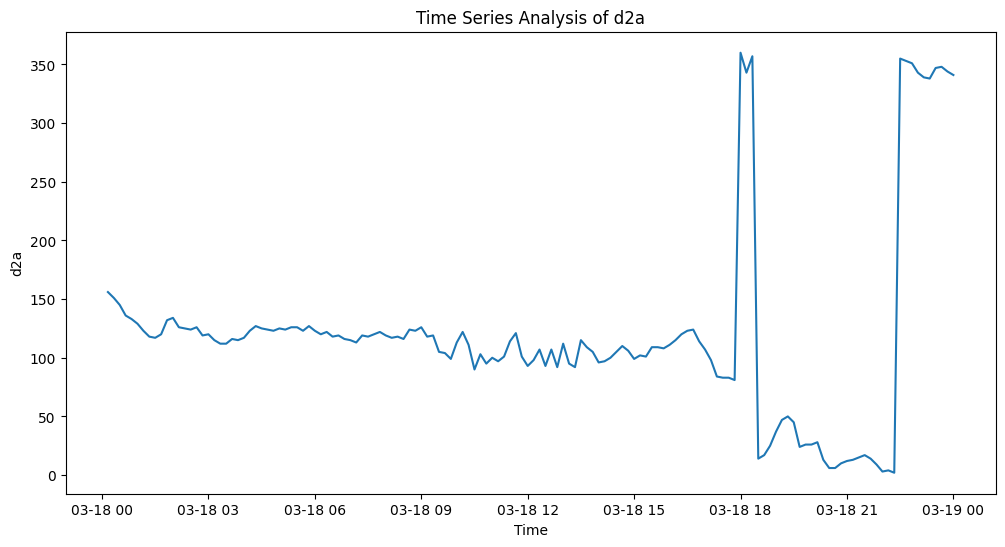

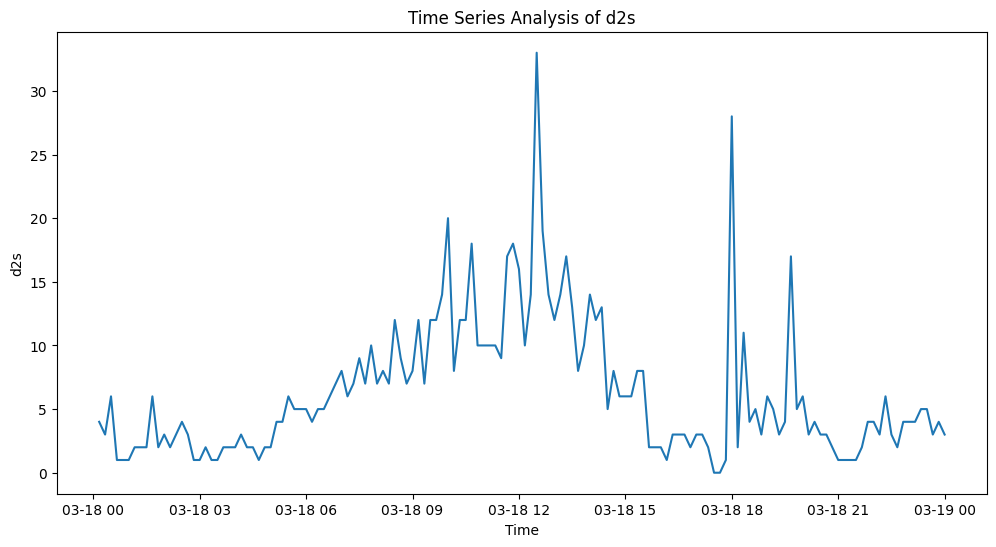

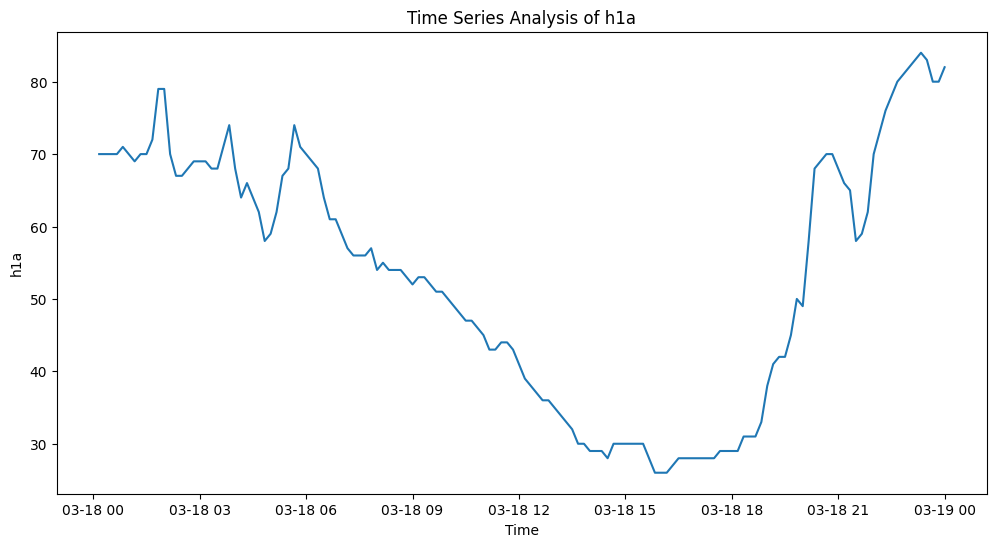

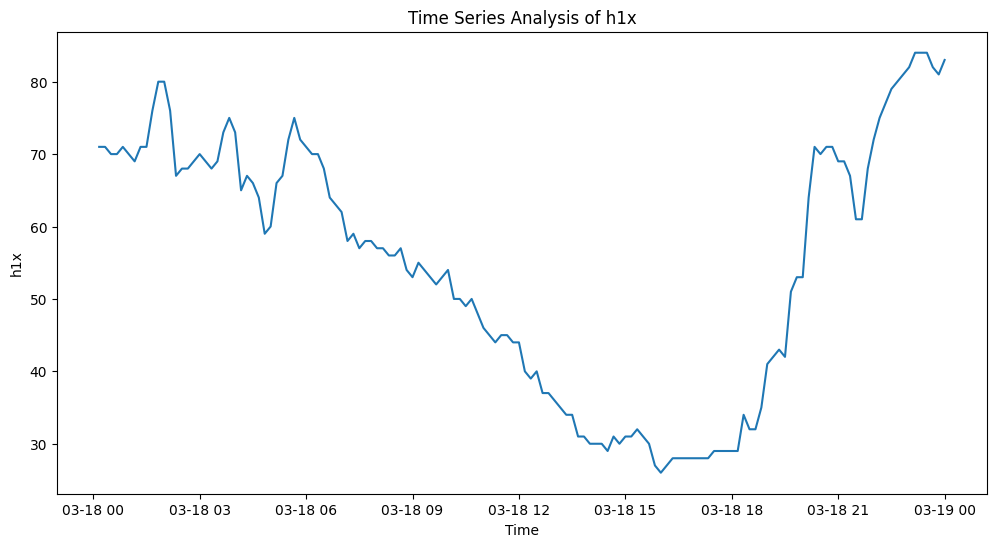

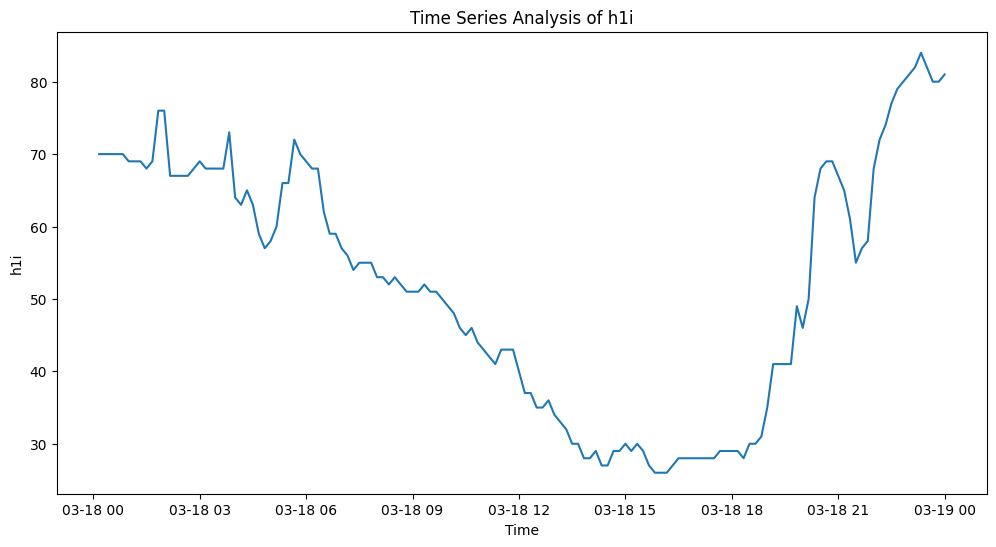

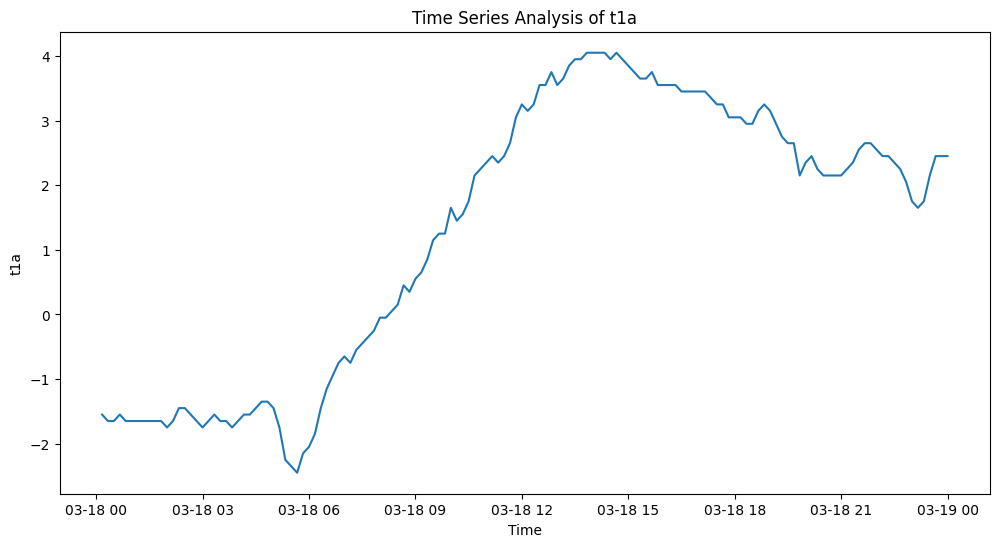

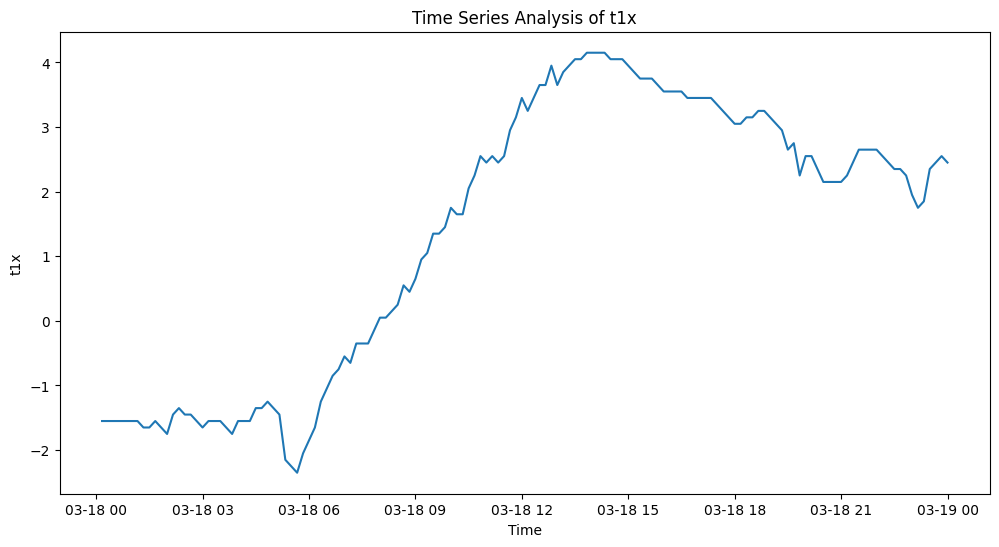

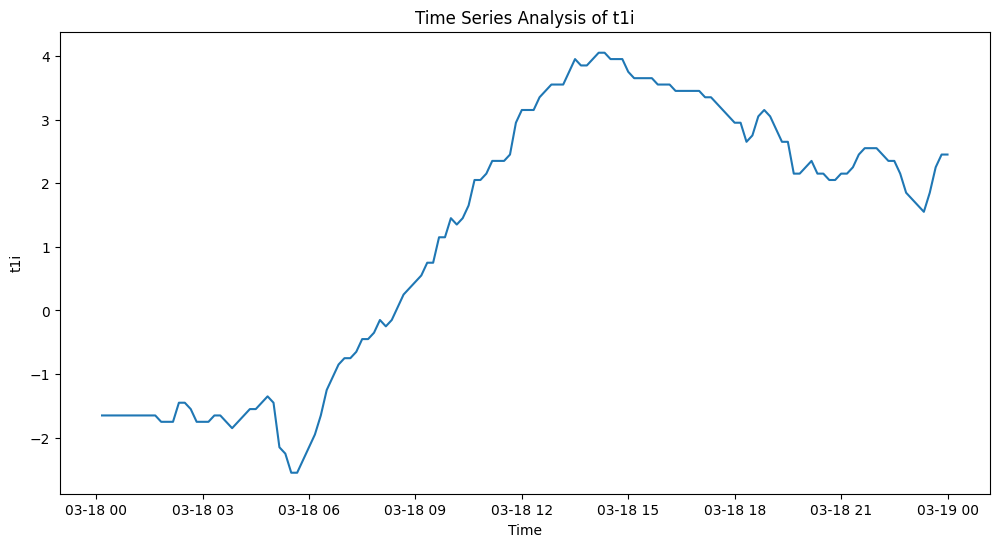

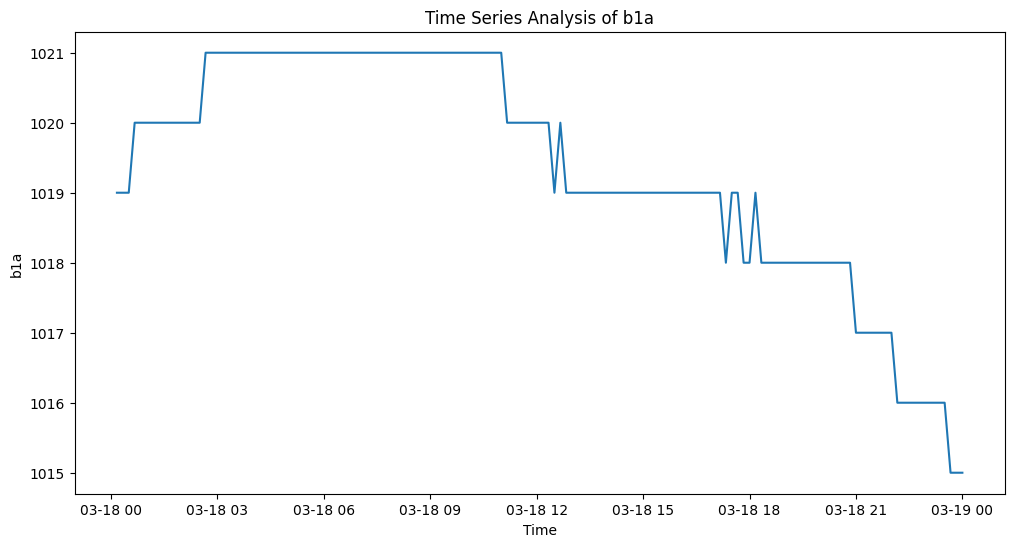

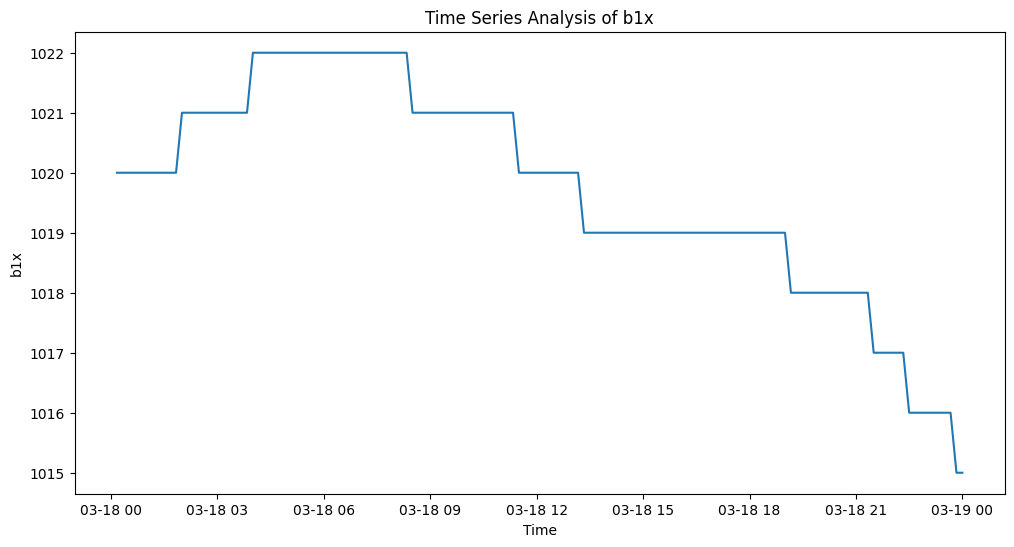

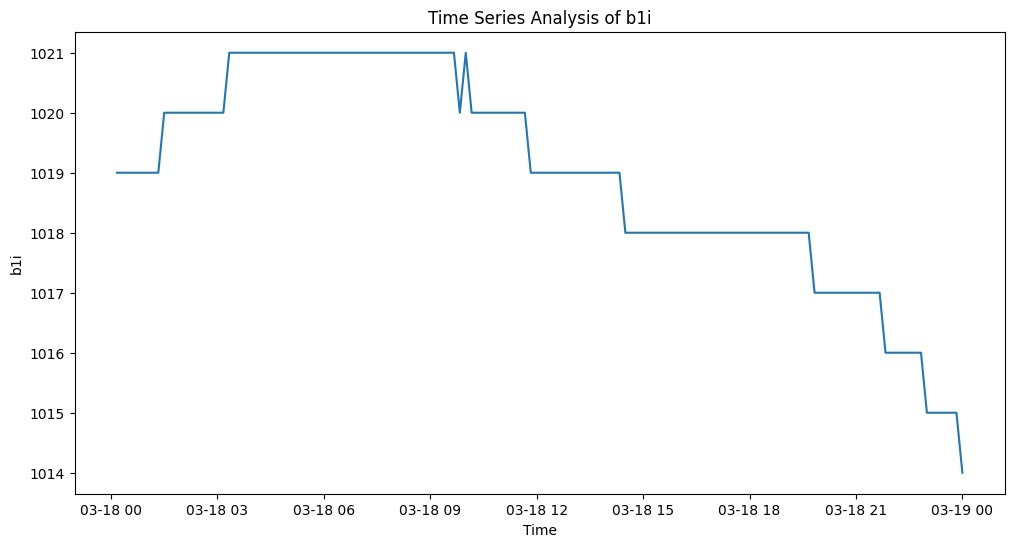

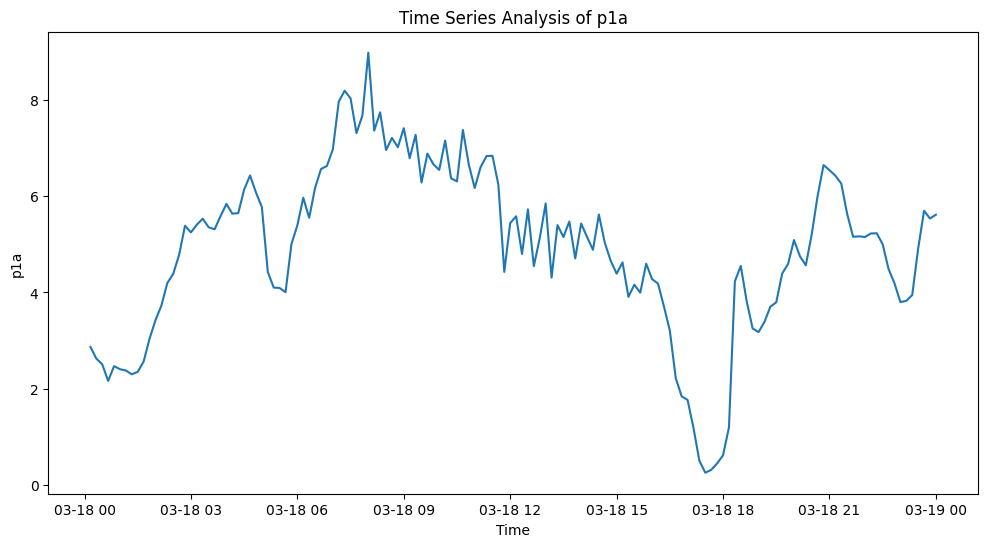

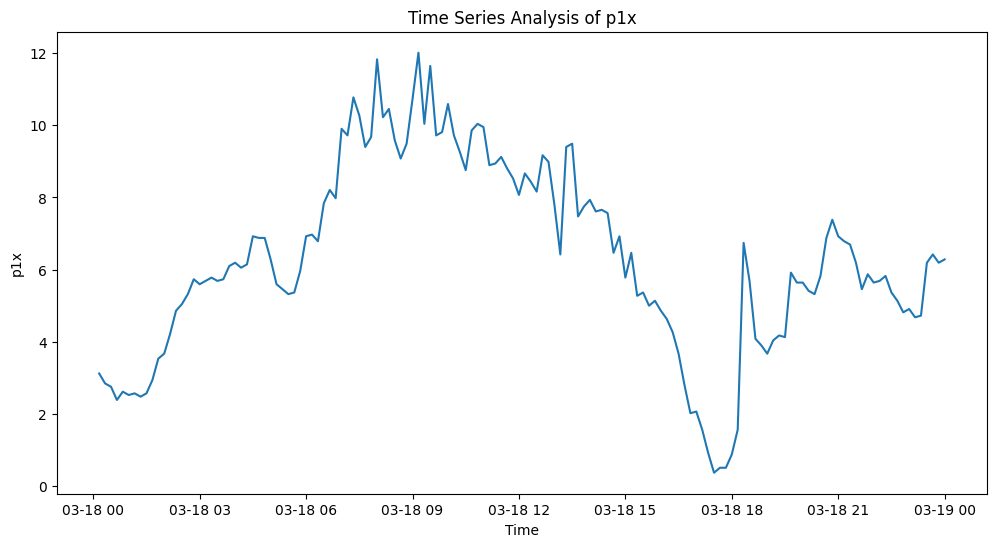

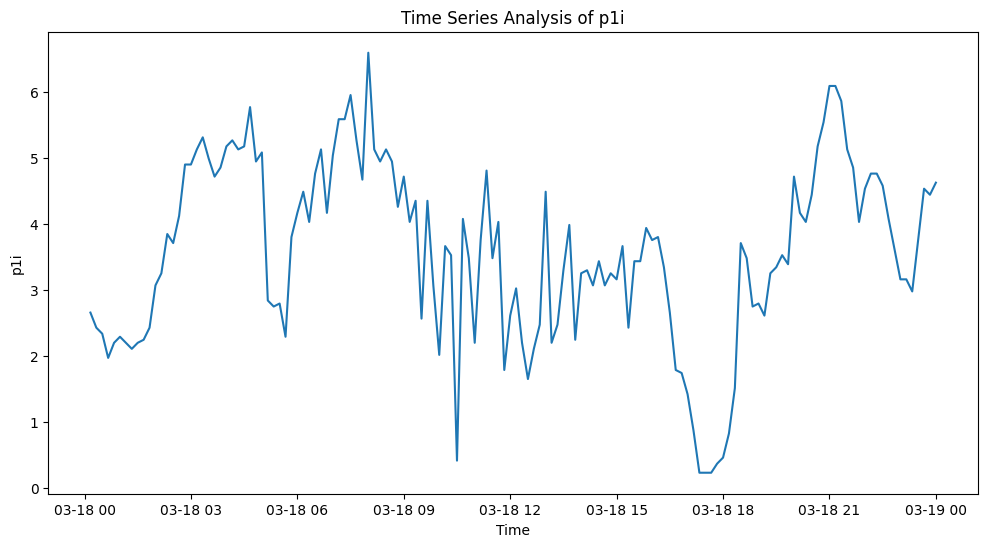

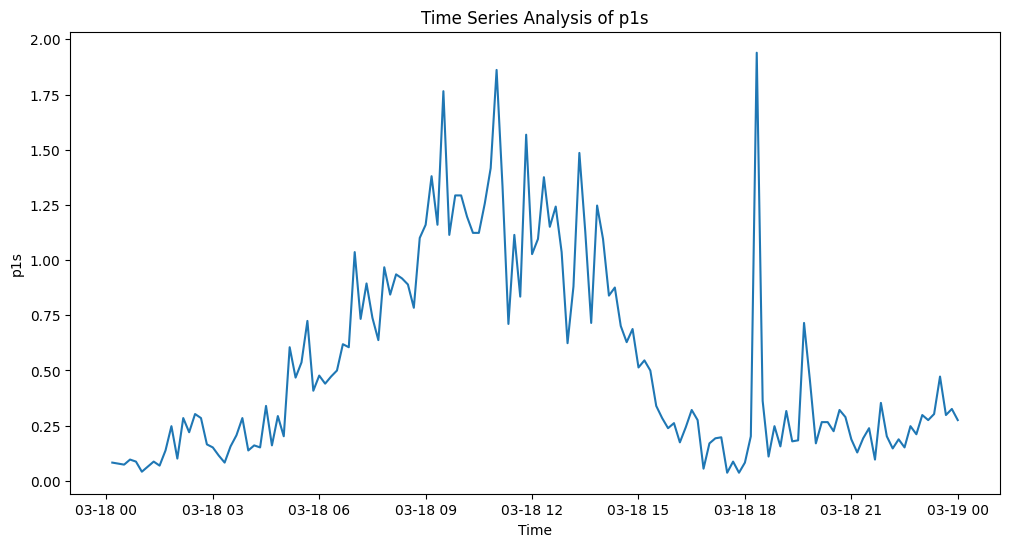

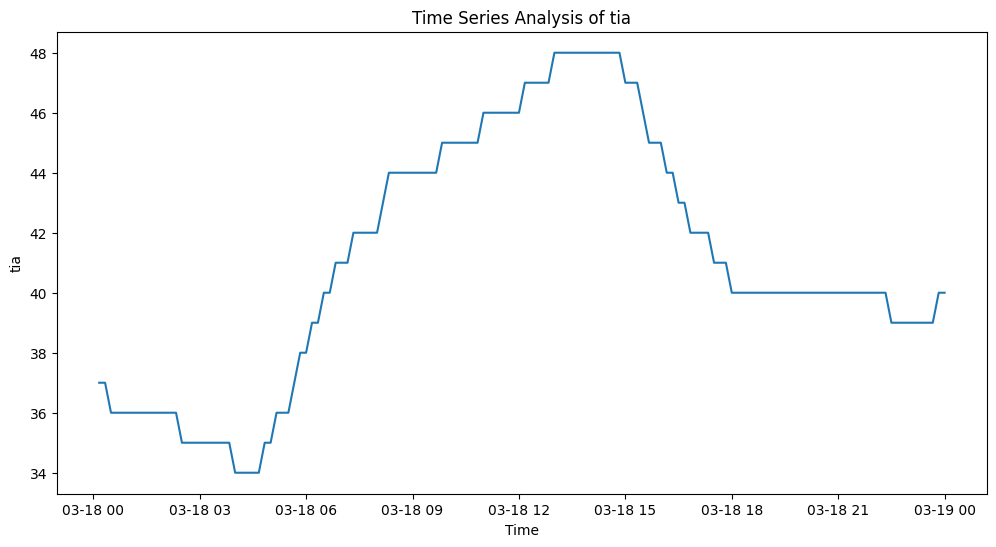

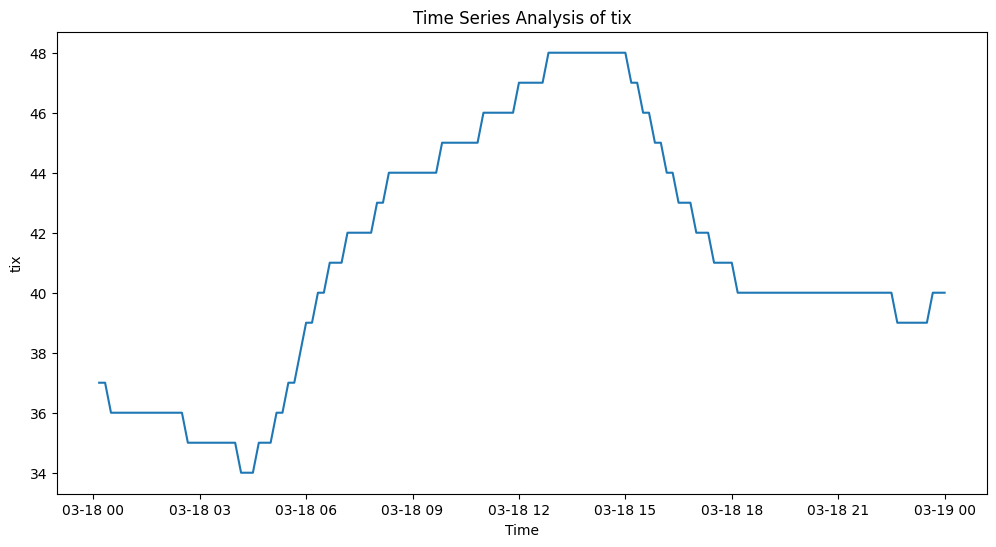

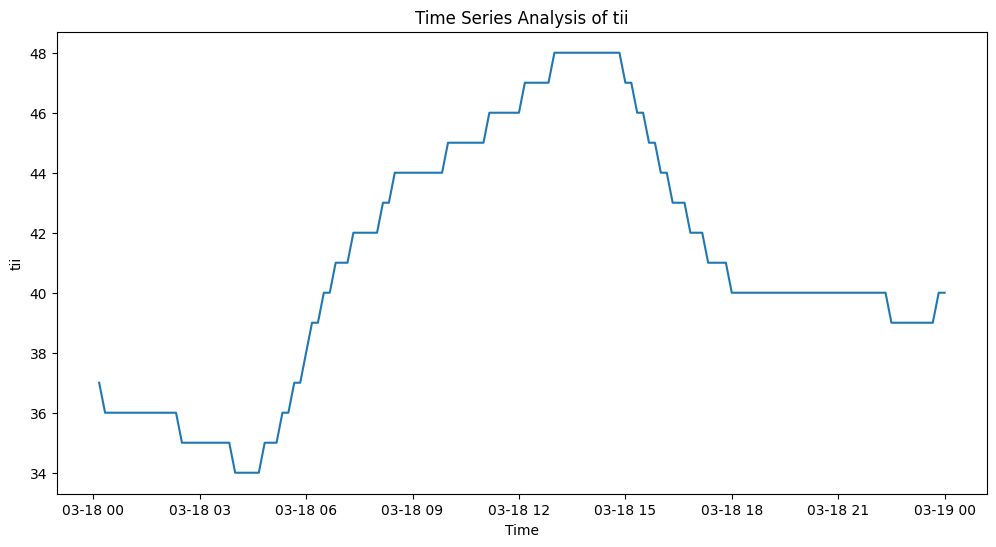

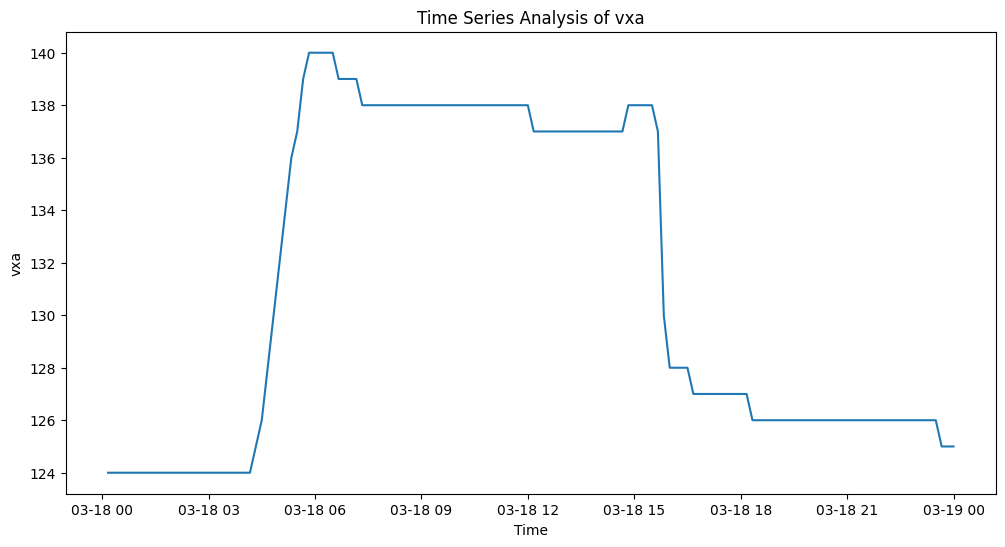

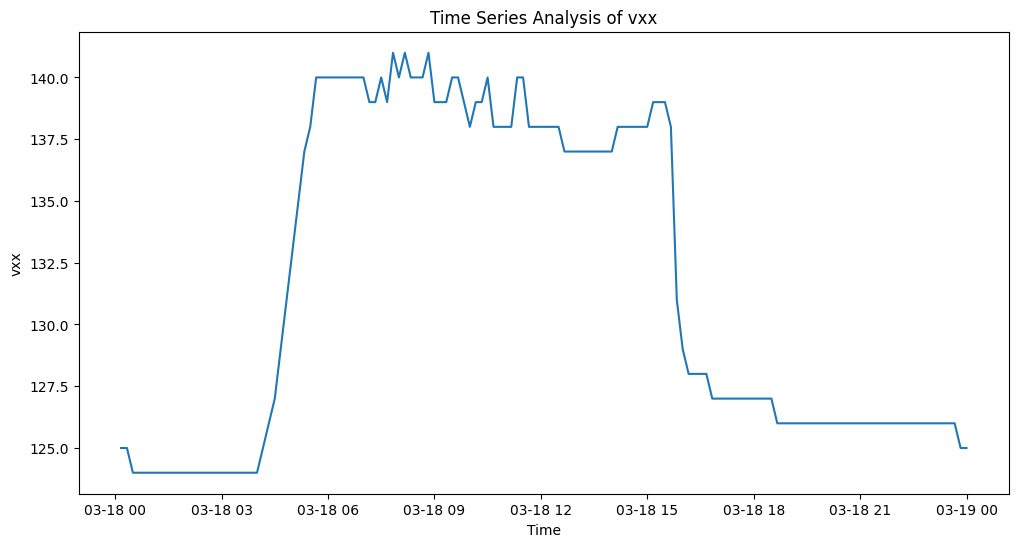

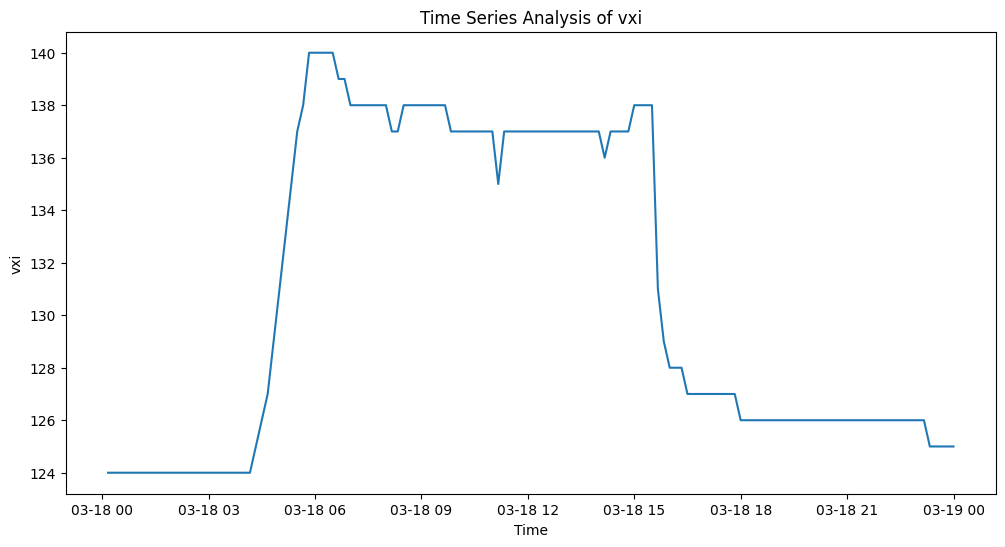

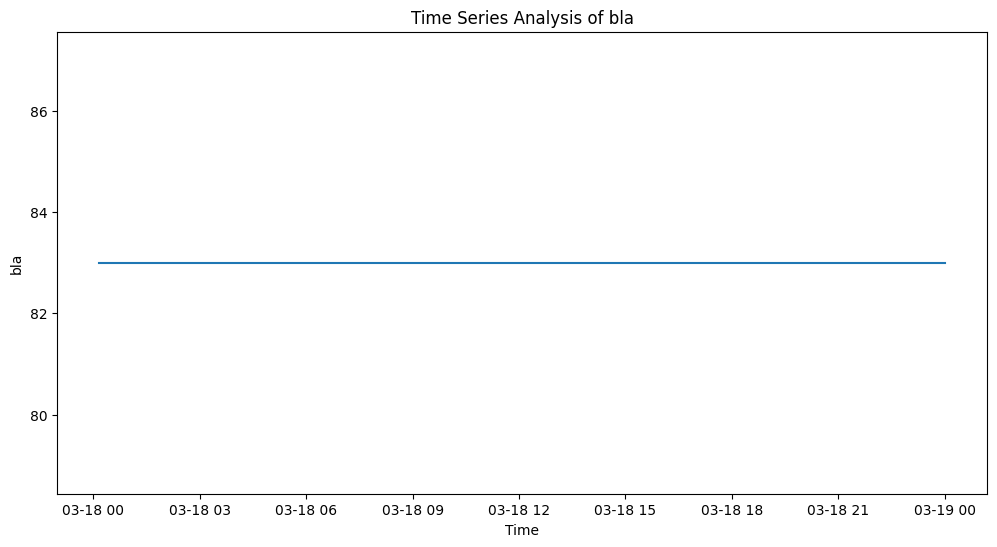

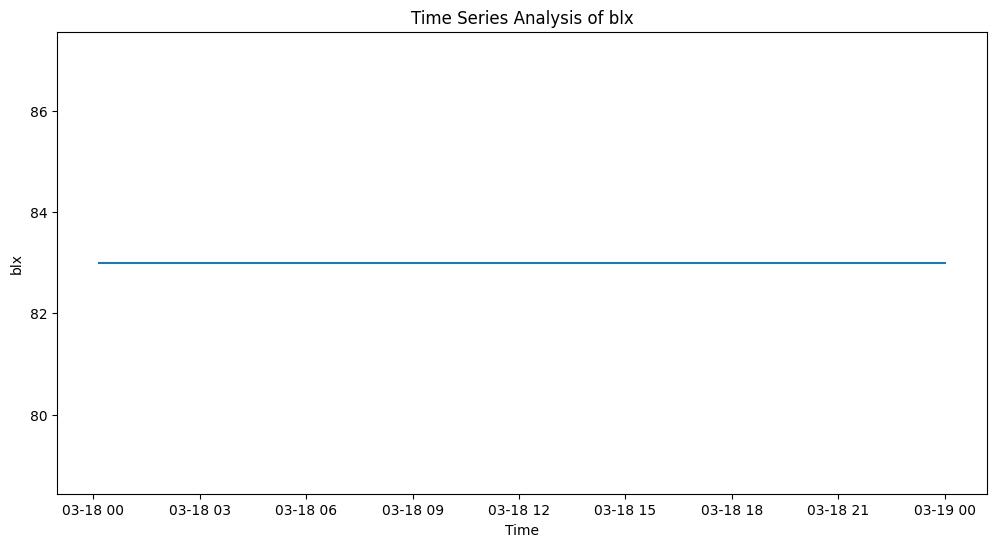

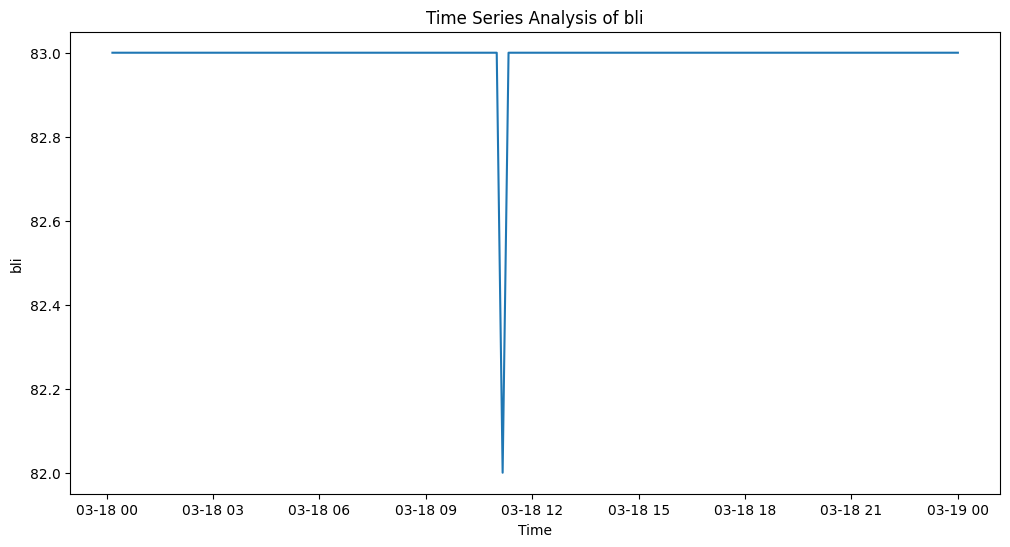

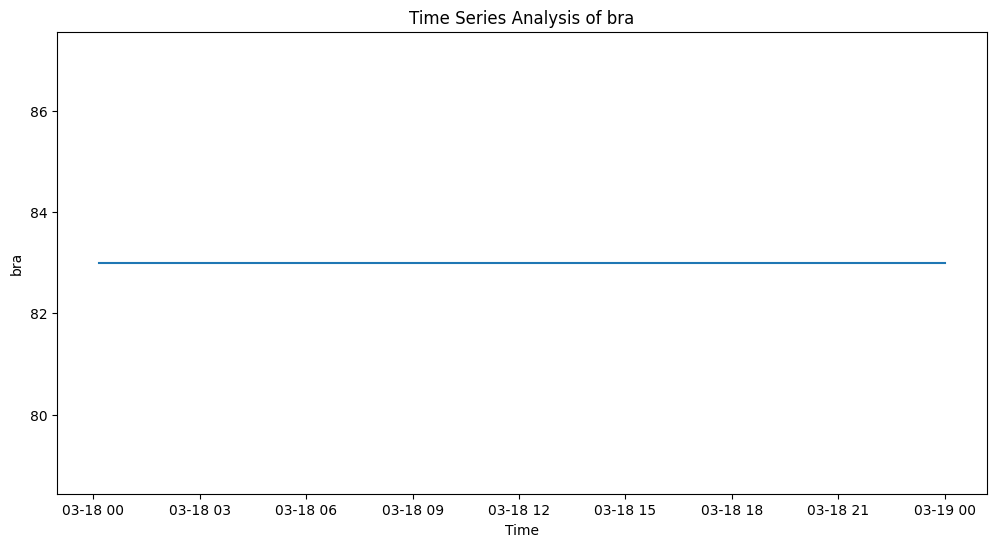

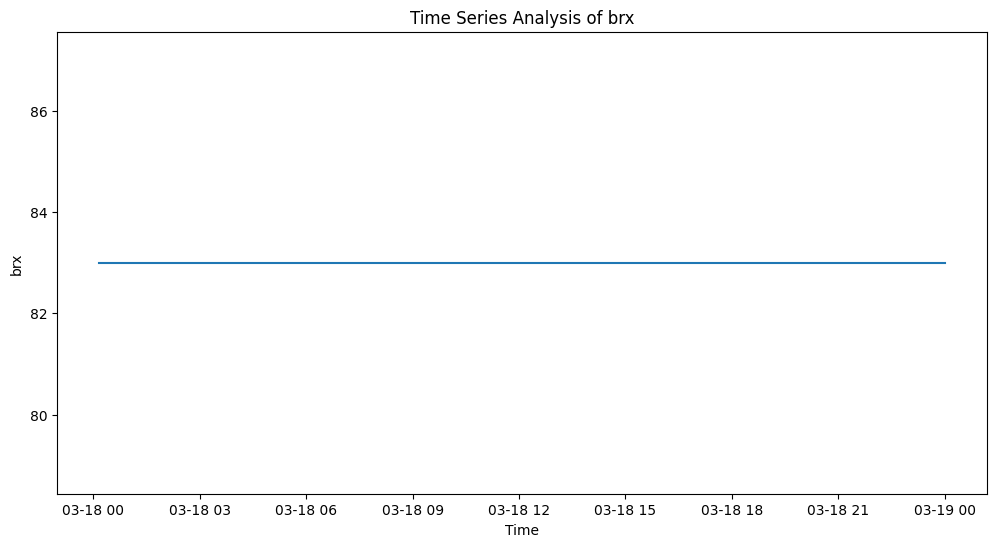

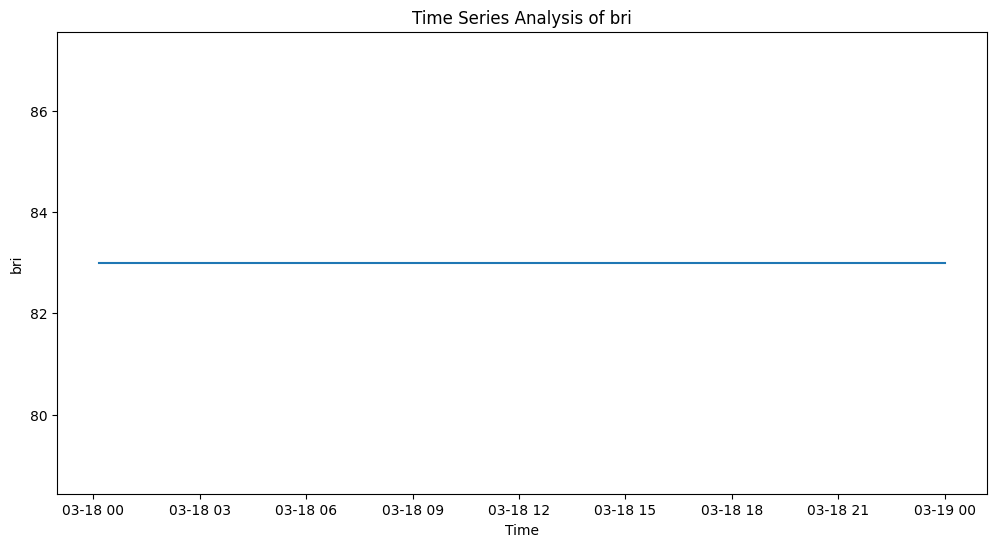

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

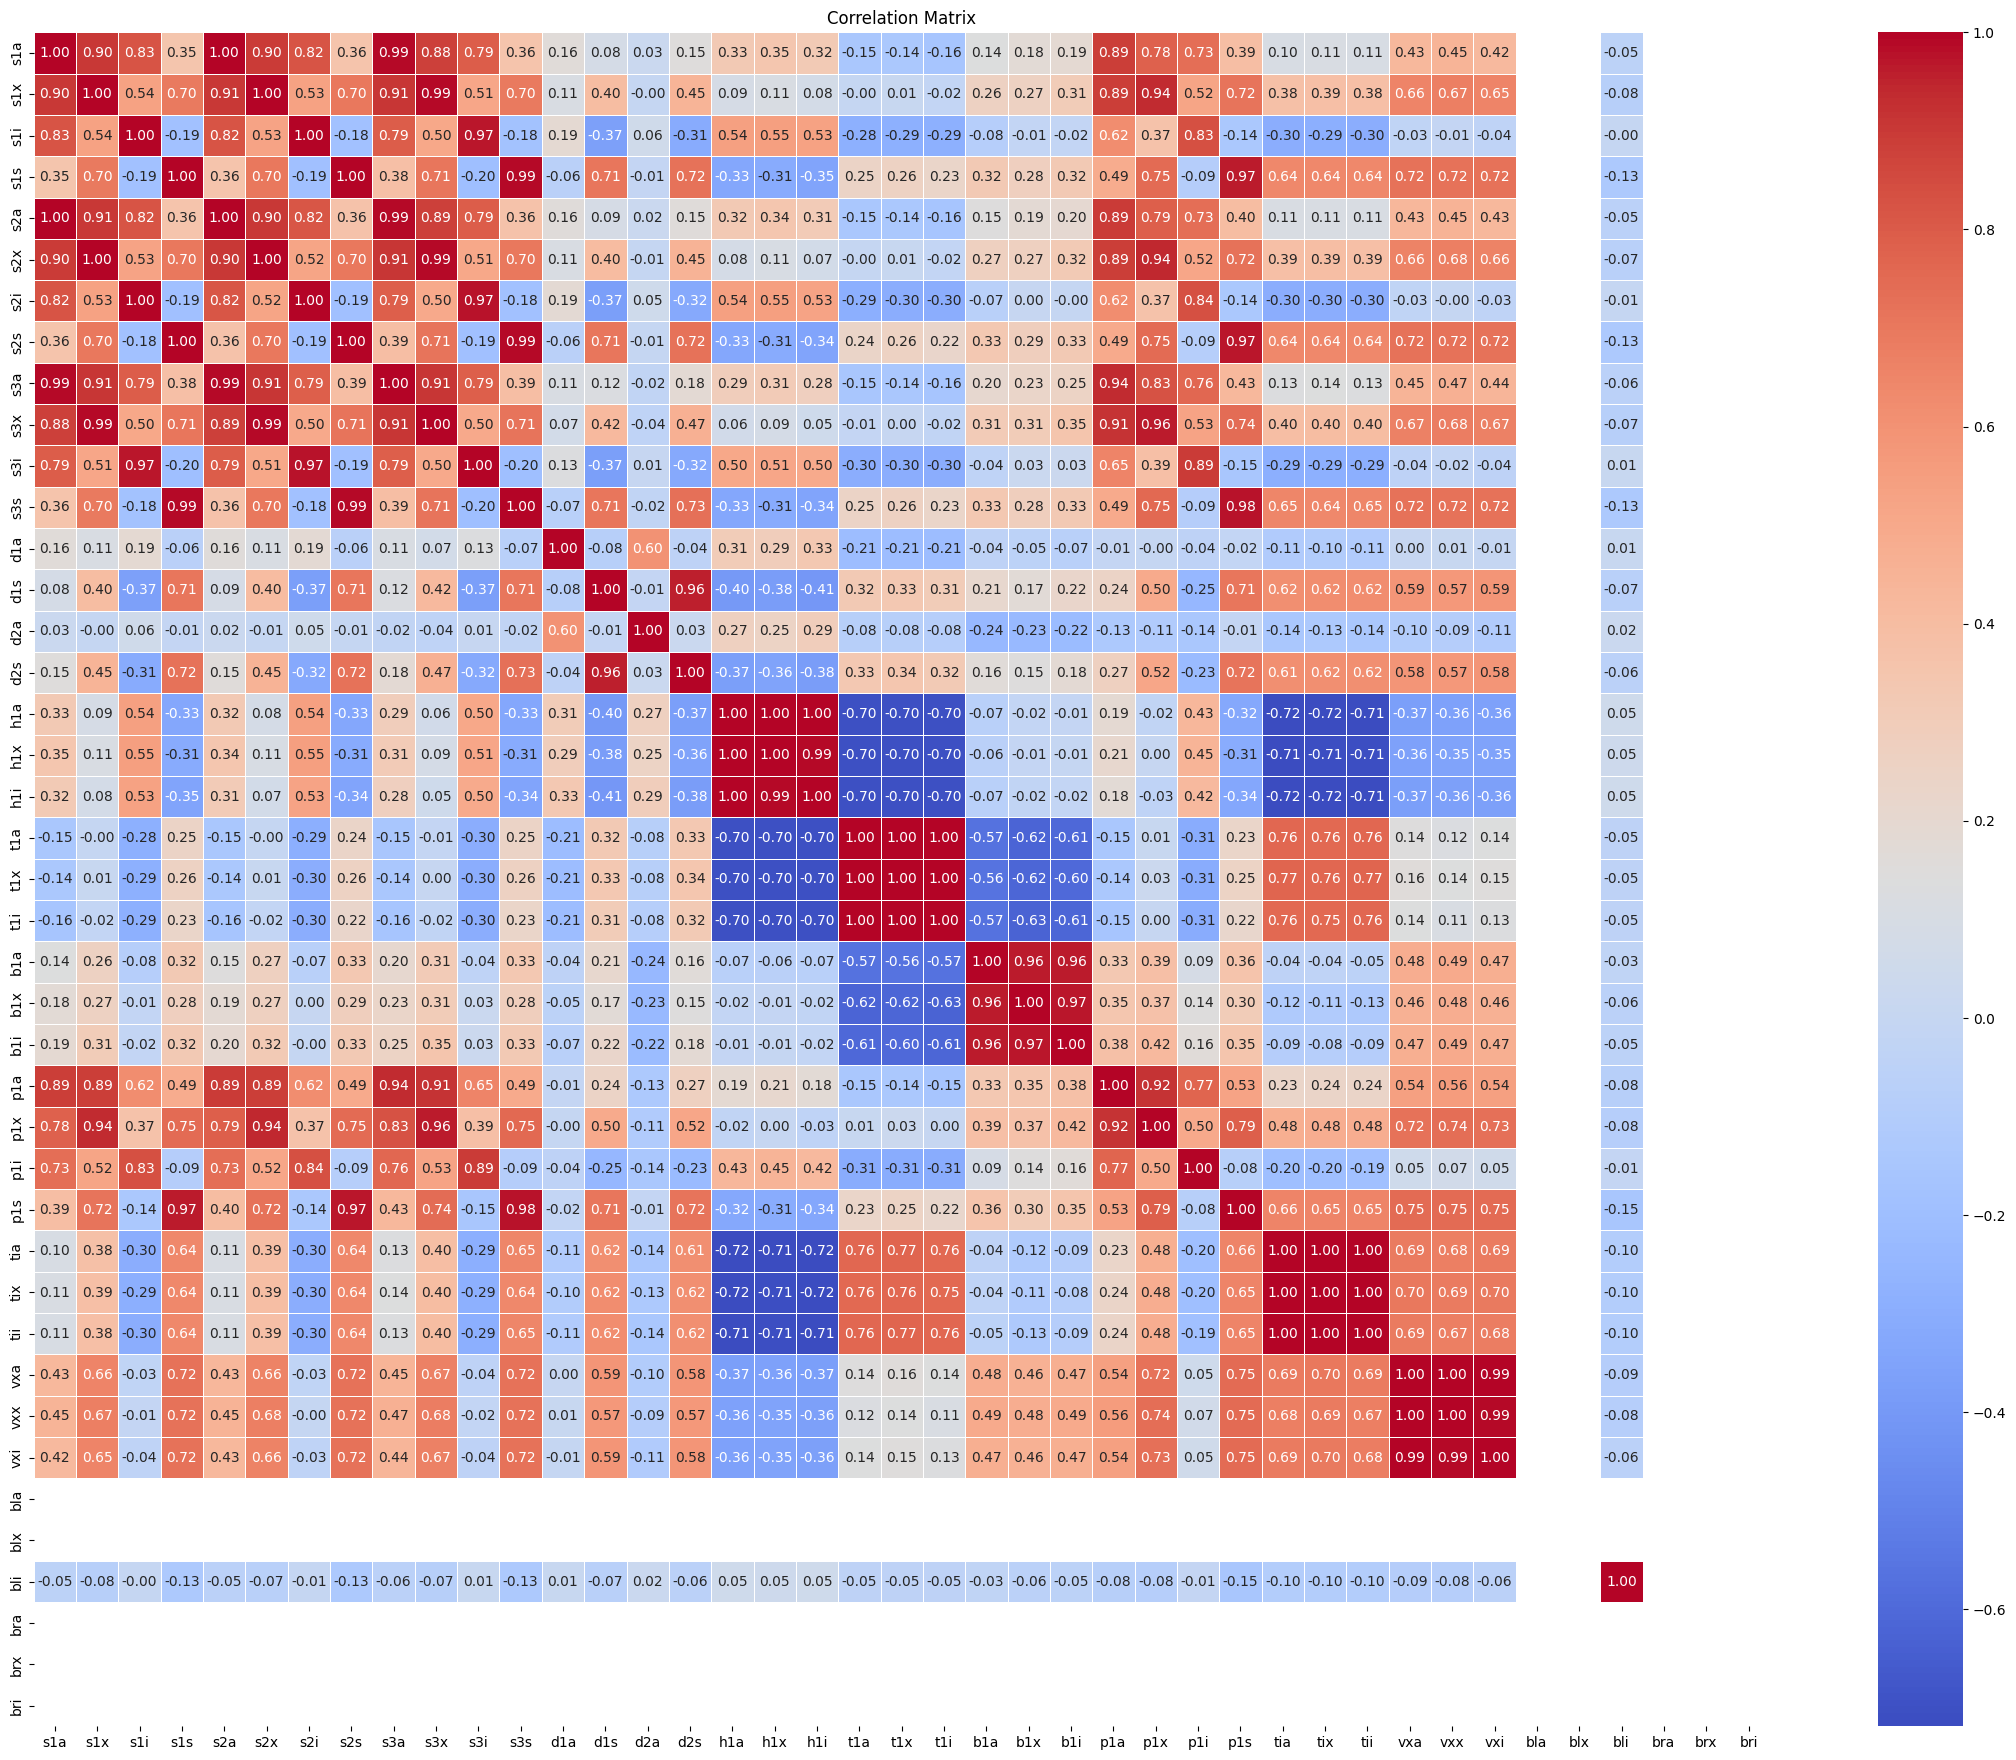

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

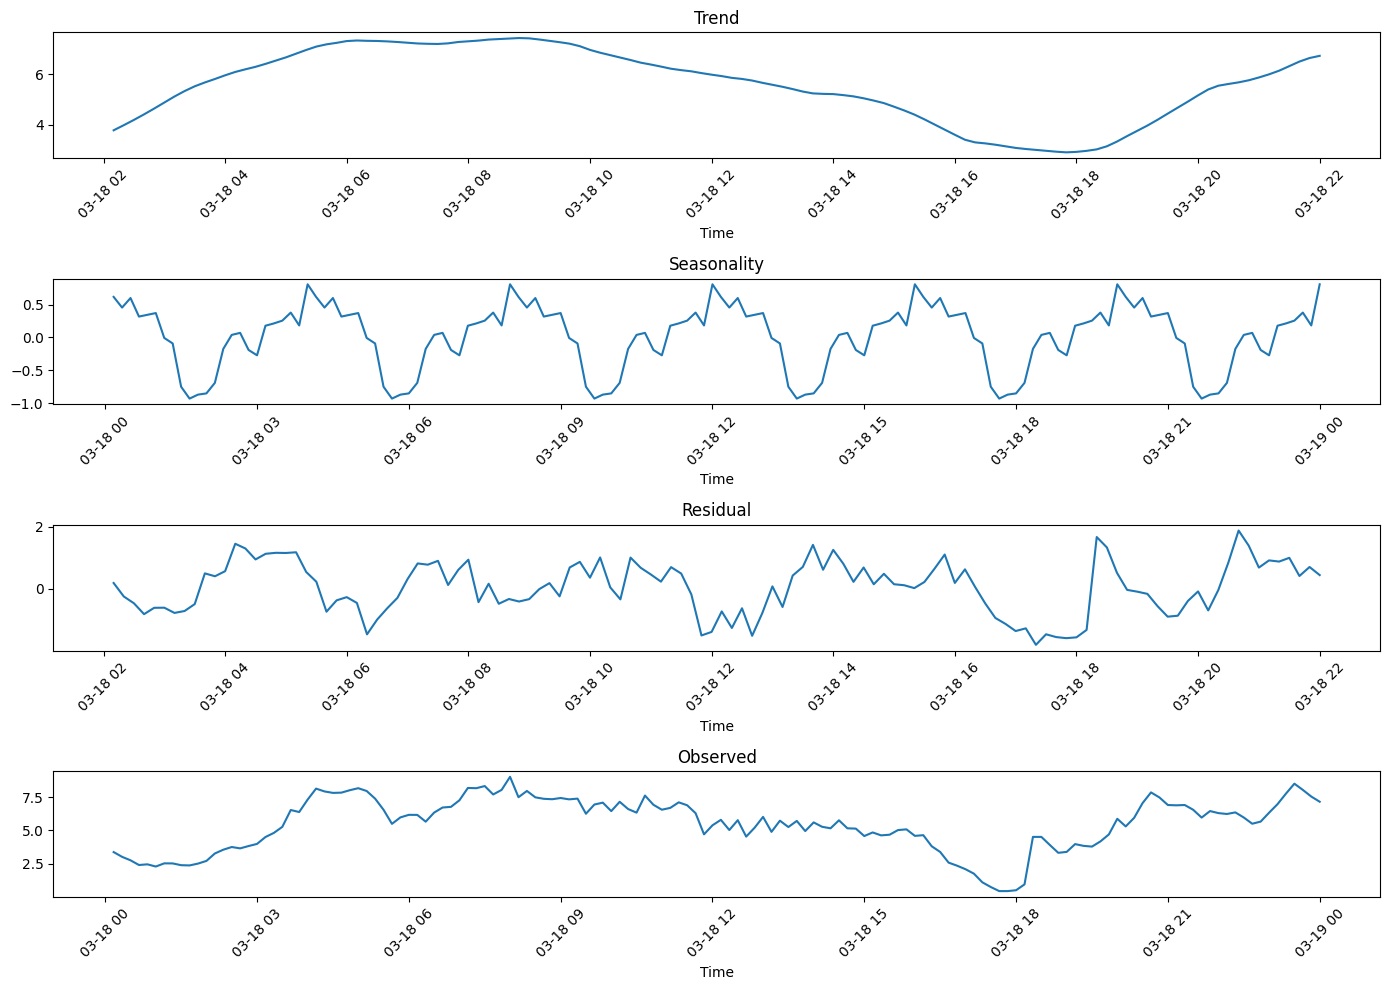

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


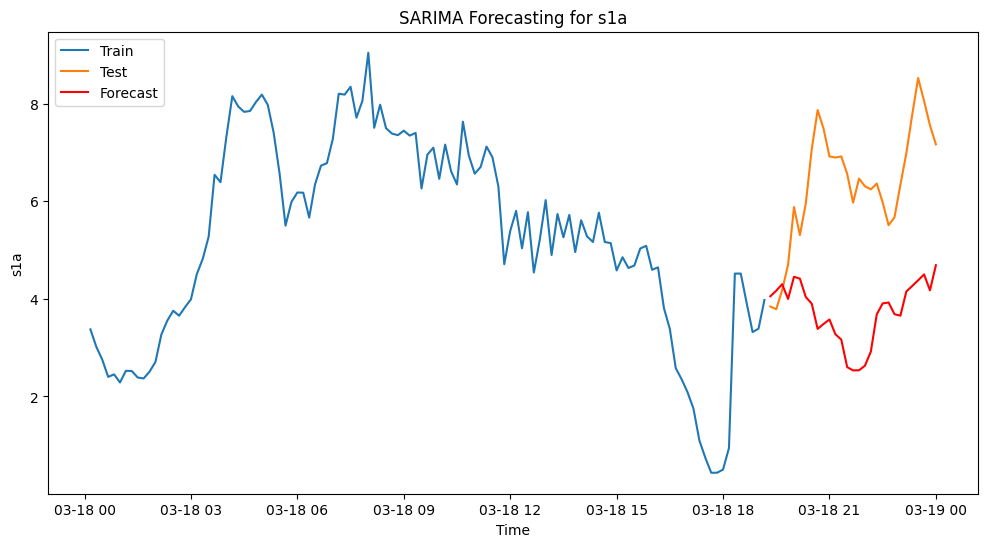

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()